# Восстановление золота из руды

**Описание проекта**

Подготовьте прототип модели машинного обучения для [«Цифры»](https://www.zyfra.com/ "официальный сайт компании Цифра"). Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать **коэффициент восстановления золота** (КВЗ) из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:
1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

**Технологический процесс**

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

1. _Флотация._
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).
2. _Очистка._ 
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

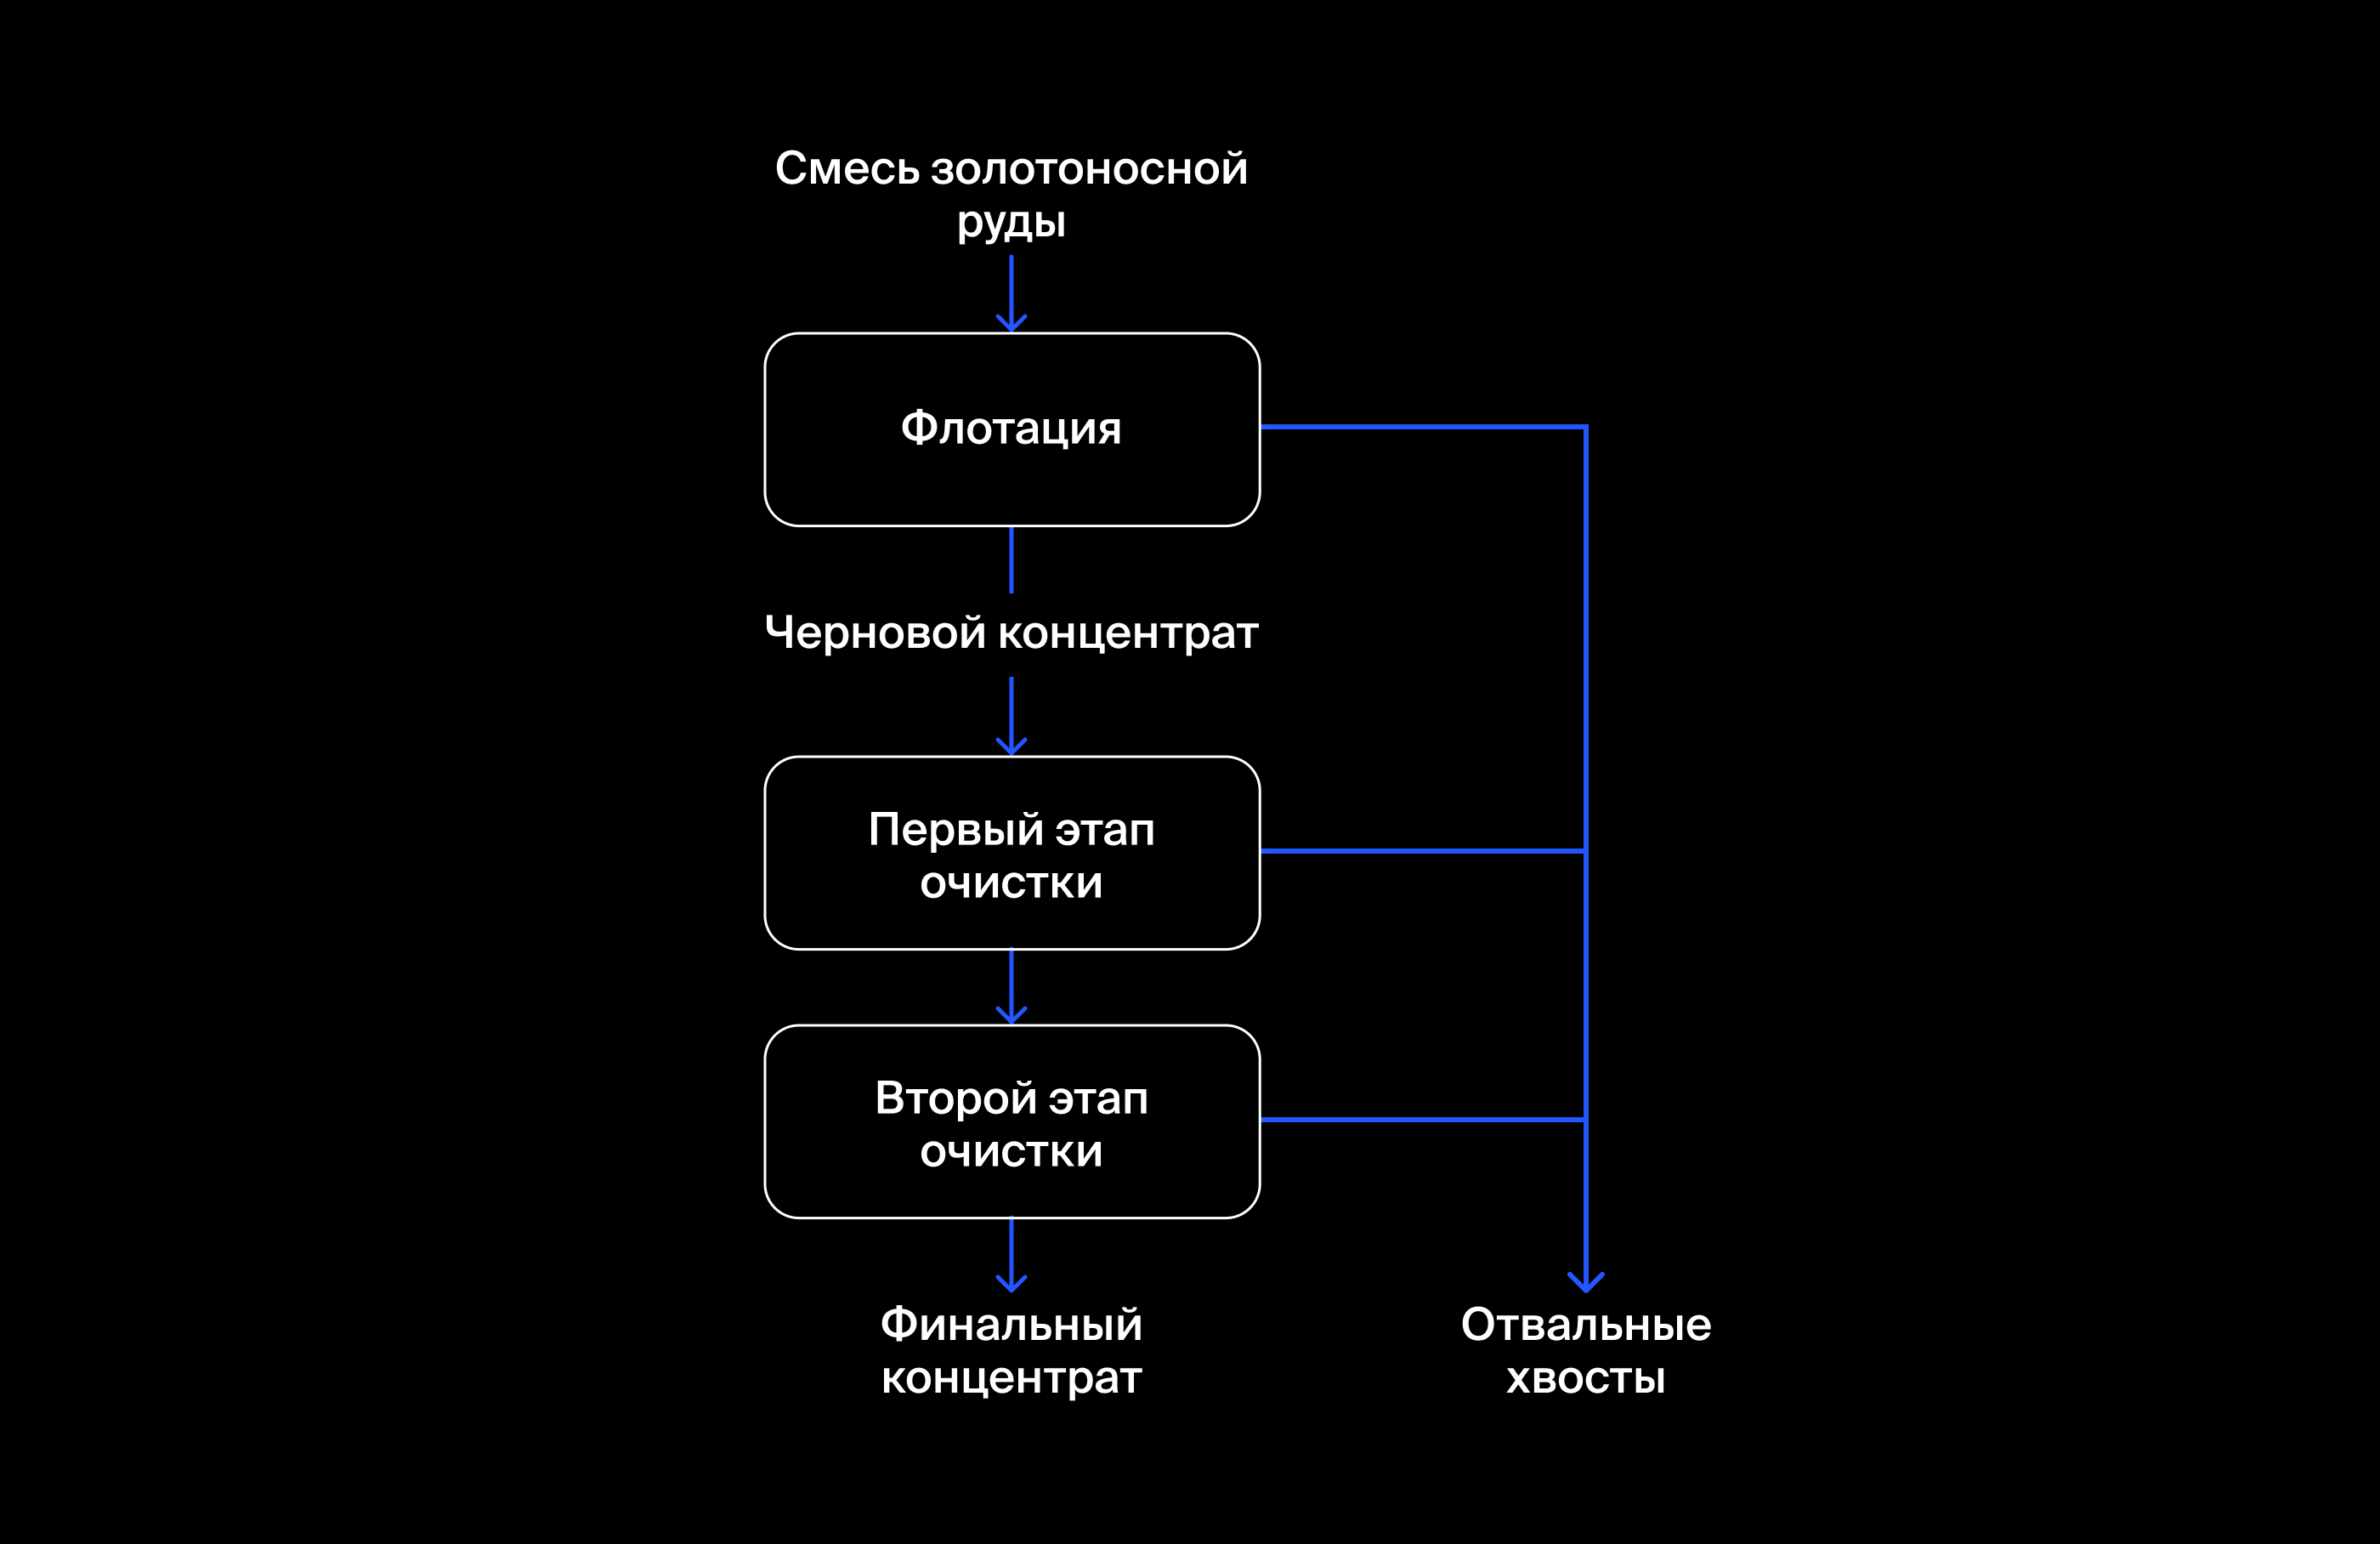

___

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item">
        <li><span><a href="#Чтение-и-знакомство-с-данными" data-toc-modified-id="Чтение-и-знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение и знакомство с данными</a></span></li>
        <li><span><a href="#Контроль-вычислений" data-toc-modified-id="Контроль-вычислений-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Контроль вычислений</a></span></li>
        <li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков</a></span></li>
        <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li>
    <li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item">
        <li><span><a href="#Изменения-концентраций-металлов-на-различных-этапах-очистки" data-toc-modified-id="Изменения-концентраций-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменения концентраций металлов на различных этапах очистки</a></span></li>
        <li><span><a href="#Сравнение-размеров-гранул-материала" data-toc-modified-id="Сравнение-размеров-гранул-материала-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение размеров гранул материала</a></span></li>
        <li><span><a href="#Анализ-суммарной-концентрацию-всех-веществ-на-разных-этапах" data-toc-modified-id="Анализ-суммарной-концентрацию-всех-веществ-на-разных-этапах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ суммарной концентрацию всех веществ на разных этапах</a></span></li></ul></li>
    <li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item">
        <li><span><a href="#Функция-для-вычисления-sMAPE." data-toc-modified-id="Функция-для-вычисления-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE.</a></span></li>
        <li><span><a href="#Исследование-моделей-для-КВЗ-из-финального-концентрата" data-toc-modified-id="Исследование-моделей-для-КВЗ-из-финального-концентрата-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование моделей для КВЗ из финального концентрата</a></span></li>
        <li><span><a href="#Исследование-моделей-для-КВЗ-из-чернового-концентрата" data-toc-modified-id="Исследование-моделей-для-КВЗ-из-чернового-концентрата-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование моделей для КВЗ из чернового концентрата</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тестирование модели</a></span></li>
        <li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li>
    <li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li>
</ul></div>

## Подготовка данных

In [1]:
# импорт осн. библиотек
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# импорт спец. объектов
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# фиксация случайности/воспроизводимости
RS = 12345

### Чтение и знакомство с данными

In [2]:
try:
    try:
        # домашняя версия
        df_train = pd.read_csv('datasets\gold_recovery_train_new.csv')
        df_test  = pd.read_csv('datasets\gold_recovery_test_new.csv')
        df_full  = pd.read_csv('datasets\gold_recovery_full_new.csv')
    except:
        # сетевая версия
        df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
        df_test  = pd.read_csv('/datasets/gold_recovery_test_new.csv')
        df_full  = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    
    # контроль чтения данных
    display(df_train.head(2))
    display(df_test.head(2))
    display(df_full.head(2))
    
except:
    print('Не удалось прочесть файл. Возможно, был указан неверный путь.')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


**Описание данных**
- Rougher feed — исходное сырье
- Rougher tails — отвальные хвосты
- Rougher additions (или reagent additions) — флотационные реагенты:
  - Xanthate — ксантогенат (промотер, или активатор флотации);
  - Sulphate — сульфат (на данном производстве сульфид натрия);
  - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов:**
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков** образовываются по форме: **[этап].[тип_параметра].[название_параметра]**
Пример: `rougher.input.feed_ag`

Возможные значения для блока **[этап]**:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока **[тип_параметра]**:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

Знакомство с параметрами технических процессов и изменение порядка колонок с алфавитного, на порядок следования тех. процессов.

In [3]:
new_columns = ['date',
                # грубый этап (флотация)
               'rougher.calculation.sulfate_to_au_concentrate',
               'rougher.calculation.floatbank10_sulfate_to_au_feed',
               'rougher.calculation.floatbank11_sulfate_to_au_feed',
               'rougher.calculation.au_pb_ratio',
               'rougher.input.feed_ag',
               'rougher.input.feed_pb',
               'rougher.input.feed_rate',
               'rougher.input.feed_size',
               'rougher.input.feed_sol',
               'rougher.input.feed_au',
               'rougher.input.floatbank10_sulfate',
               'rougher.input.floatbank10_xanthate',
               'rougher.input.floatbank11_sulfate',
               'rougher.input.floatbank11_xanthate',
               'rougher.output.concentrate_ag',
               'rougher.output.concentrate_pb',
               'rougher.output.concentrate_sol',
               'rougher.output.concentrate_au',
               'rougher.output.recovery',
               'rougher.output.tail_ag',
               'rougher.output.tail_pb',
               'rougher.output.tail_sol',
               'rougher.output.tail_au',
               'rougher.state.floatbank10_a_air',
               'rougher.state.floatbank10_a_level',
               'rougher.state.floatbank10_b_air',
               'rougher.state.floatbank10_b_level',
               'rougher.state.floatbank10_c_air',
               'rougher.state.floatbank10_c_level',
               'rougher.state.floatbank10_d_air',
               'rougher.state.floatbank10_d_level',
               'rougher.state.floatbank10_e_air',
               'rougher.state.floatbank10_e_level',
               'rougher.state.floatbank10_f_air',
               'rougher.state.floatbank10_f_level',
                    # первичный чистовой этап
                   'primary_cleaner.input.sulfate',
                   'primary_cleaner.input.depressant',
                   'primary_cleaner.input.feed_size',
                   'primary_cleaner.input.xanthate',
                   'primary_cleaner.output.concentrate_ag',
                   'primary_cleaner.output.concentrate_pb',
                   'primary_cleaner.output.concentrate_sol',
                   'primary_cleaner.output.concentrate_au',
                   'primary_cleaner.output.tail_ag',
                   'primary_cleaner.output.tail_pb',
                   'primary_cleaner.output.tail_sol',
                   'primary_cleaner.output.tail_au',
                   'primary_cleaner.state.floatbank8_a_air',
                   'primary_cleaner.state.floatbank8_a_level',
                   'primary_cleaner.state.floatbank8_b_air',
                   'primary_cleaner.state.floatbank8_b_level',
                   'primary_cleaner.state.floatbank8_c_air',
                   'primary_cleaner.state.floatbank8_c_level',
                   'primary_cleaner.state.floatbank8_d_air',
                   'primary_cleaner.state.floatbank8_d_level',
                        # вторичный чистовой этап
                       'secondary_cleaner.output.tail_ag',
                       'secondary_cleaner.output.tail_pb',
                       'secondary_cleaner.output.tail_sol',
                       'secondary_cleaner.output.tail_au',
                       'secondary_cleaner.state.floatbank2_a_air',
                       'secondary_cleaner.state.floatbank2_a_level',
                       'secondary_cleaner.state.floatbank2_b_air',
                       'secondary_cleaner.state.floatbank2_b_level',
                       'secondary_cleaner.state.floatbank3_a_air',
                       'secondary_cleaner.state.floatbank3_a_level',
                       'secondary_cleaner.state.floatbank3_b_air',
                       'secondary_cleaner.state.floatbank3_b_level',
                       'secondary_cleaner.state.floatbank4_a_air',
                       'secondary_cleaner.state.floatbank4_a_level',
                       'secondary_cleaner.state.floatbank4_b_air',
                       'secondary_cleaner.state.floatbank4_b_level',
                       'secondary_cleaner.state.floatbank5_a_air',
                       'secondary_cleaner.state.floatbank5_a_level',
                       'secondary_cleaner.state.floatbank5_b_air',
                       'secondary_cleaner.state.floatbank5_b_level',
                       'secondary_cleaner.state.floatbank6_a_air',
                       'secondary_cleaner.state.floatbank6_a_level',
                            # финальный результат
                           'final.output.concentrate_ag',
                           'final.output.concentrate_pb',
                           'final.output.concentrate_sol',
                           'final.output.concentrate_au',
                           'final.output.recovery',
                           'final.output.tail_ag',
                           'final.output.tail_pb',
                           'final.output.tail_sol',
                           'final.output.tail_au']

df_train = df_train.reindex(columns=new_columns)
df_full = df_full.reindex(columns=new_columns) 

### Контроль вычислений

Необходимо проверьте, что эффективность обогащения рассчитана правильно:
- Вычислитm её на обучающей выборке для признака `rougher.output.recovery`, `final.output.recovery`.
- Найдите _MAE_ между вашими расчётами и значением признака.

Коэфициент восстановления золота (_КВЗ_) расчитывается по формуле:

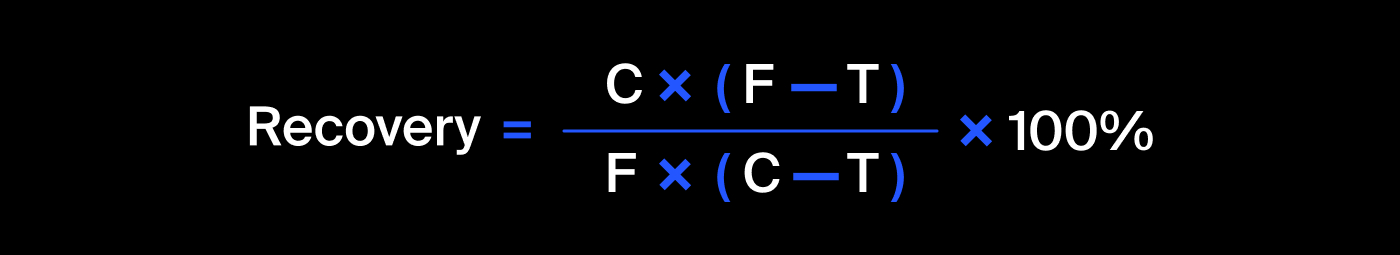

где:
- **F**, `feed` — доля золота в сырье до флотации/очистки;
- **C**, `concentrate` — доля золота в концентрате после флотации/очистки;
- **T**, `tail` — доля золота в отвальных хвостах после флотации/очистки.

In [4]:
# функция расчёта коэф. восстановления золота
def calculation_recovery(feed, concentrate, tail):
    recovery = (concentrate*(feed-tail)) / (feed*(concentrate-tail)) * 100
    return recovery

In [5]:
# выделение параметров грубова этапа обогащения
train_rougher_feed = df_train['rougher.input.feed_au']
train_rougher_concentrate = df_train['rougher.output.concentrate_au']
train_rougher_tail = df_train['rougher.output.tail_au']
train_rougher_recovery = df_train['rougher.output.recovery']

calc_rougher_recovery = calculation_recovery(train_rougher_feed, train_rougher_concentrate, train_rougher_tail)
mae_recovery = mean_absolute_error(train_rougher_recovery, calc_rougher_recovery)

print('MAE между исходными и рассчитанными КВЗ по завершению флотации: {:.14f}'.format(mae_recovery))

MAE между исходными и рассчитанными КВЗ по завершению флотации: 0.00000000000001


In [6]:
# выделение параметров всего процесса обогащения
train_final_feed = df_train['rougher.input.feed_au']
train_final_concentrate = df_train['final.output.concentrate_au']
train_final_tail = df_train['final.output.tail_au']
train_final_recovery = df_train['final.output.recovery']

calc_final_recovery = calculation_recovery(train_final_feed, train_final_concentrate, train_final_tail)
mae_recovery = mean_absolute_error(train_final_recovery, calc_final_recovery)

print('MAE между исходными и рассчитанными КВЗ по завершению полного цикла обогащения: {:.14f}'.format(mae_recovery))

MAE между исходными и рассчитанными КВЗ по завершению полного цикла обогащения: 0.00000000000001


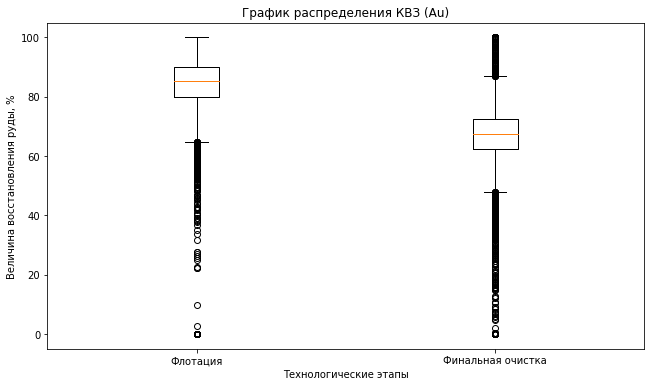

In [7]:
# распределение КВЗ в треннировочной выборке
plt.figure(figsize=(10.7, 6))
plt.boxplot(df_train[['rougher.output.recovery', 'final.output.recovery']], labels = ['Флотация', 'Финальная очистка'])
plt.title('График распределения КВЗ (Au)')
plt.ylabel('Величина восстановления руды, %')
plt.xlabel('Технологические этапы')
plt.show();

In [8]:
# аномалии
pd.set_option('display.max_rows', 10)

display(df_train[df_train['rougher.output.recovery'] == 0])
df_train = df_train[df_train['rougher.output.recovery'] != 0]

display(df_train[df_train['final.output.recovery'] == 0])
df_train = df_train[df_train['final.output.recovery'] != 0]

df_train.reset_index(drop=True, inplace=True)

,date,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,...,secondary_cleaner.state.floatbank6_a_level,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au
45,2016-01-16 21:00:00,41359.061159,3196.130244,3205.717062,2.530283,7.521974,2.811569,581.605260,65.620714,41.154430,...,-599.161228,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776
46,2016-01-16 22:00:00,41274.202372,3196.955345,3205.146739,2.572943,7.313187,2.973841,562.972841,66.014780,41.983063,...,-598.839683,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843
47,2016-01-16 23:00:00,35990.036451,3220.710538,3206.895723,3.168669,7.934791,1.763437,229.379445,40.601032,NaN,...,-600.916665,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782
48,2016-01-17 00:00:00,33615.706291,5345.102846,5341.853970,4.633621,7.756881,1.025762,228.510521,41.248945,11.816724,...,-599.440603,5.296830,10.597469,NaN,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469
49,2016-01-17 02:00:00,92479.188718,3176.672431,3179.885147,2.807268,5.393466,1.824835,550.606559,45.329106,28.380274,...,-598.475929,8.162896,8.877528,NaN,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,2018-02-11 23:59:59,41867.135021,2488.042827,2487.473814,3.049721,8.576019,2.607144,570.495631,83.488615,38.972270,...,-500.707126,4.909904,9.941006,8.191698,47.660737,83.597741,8.853800,0.717677,13.399798,1.515512
10331,2018-02-12 00:59:59,41848.524086,2482.034078,2482.197504,3.000246,8.640039,2.905023,581.010329,83.286682,39.239893,...,-497.924873,4.797572,9.889303,8.326773,47.801056,84.738648,8.503813,0.757507,13.591903,1.573222
10332,2018-02-12 01:59:59,41849.006058,2505.176967,2505.046055,2.988534,8.769059,3.020251,573.666121,82.826034,39.314207,...,-499.685577,4.329492,9.413122,8.173988,49.412576,73.519948,8.846540,1.479231,13.094763,2.760905
10333,2018-02-12 02:59:59,42125.453808,2501.648903,2501.642307,3.037576,8.705607,2.881386,590.638687,81.400786,38.927725,...,-499.775802,4.317169,9.642271,8.396492,48.839994,78.415342,8.485093,1.155559,13.380461,2.198065


,date,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,...,secondary_cleaner.state.floatbank6_a_level,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au
644,2016-02-13 11:00:00,45778.313924,2952.203313,2943.136954,2.894754,7.407737,1.934178,500.087438,51.965198,31.762853,...,-399.619808,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052
1193,2016-03-11 10:00:00,32559.326343,2098.775030,2097.794484,3.007789,8.098125,2.588661,502.314489,49.985298,34.896012,...,-500.685521,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504
1194,2016-03-11 11:00:00,32534.407535,2102.119757,2101.265127,3.079615,7.832467,2.435125,501.677628,48.845911,34.196525,...,-500.137068,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294
1195,2016-03-11 12:00:00,32614.935512,2100.138259,2099.194438,3.104556,7.600277,2.265148,502.999469,47.430198,31.994985,...,-500.769011,0.0,0.0,0.0,0.0,0.0,10.637073,1.405778,17.195897,2.791440
1196,2016-03-11 13:00:00,32480.770879,2096.866328,2100.975298,3.099465,7.436860,2.265435,501.128474,47.440433,32.541806,...,-499.932405,0.0,0.0,0.0,0.0,0.0,10.530320,1.461550,17.556860,2.682127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,2017-07-26 04:59:59,48011.201133,3778.937029,3779.106684,1.879649,6.556481,3.204933,529.238760,53.231465,36.563187,...,-499.120826,0.0,0.0,0.0,0.0,0.0,6.928070,3.158062,11.352802,3.485946
9320,2017-08-12 03:59:59,54794.494936,5910.108066,5911.108679,2.040021,5.882902,2.814342,480.716094,53.224513,32.196856,...,-499.872109,0.0,0.0,0.0,0.0,0.0,6.296368,2.933790,9.373527,4.489584
9893,2018-01-15 20:59:59,15668.312174,2144.958166,2144.169328,2.767950,9.398085,2.653756,473.680026,46.435583,32.983850,...,-499.607997,0.0,0.0,0.0,0.0,0.0,11.408594,2.205271,3.469389,5.819537
9894,2018-01-15 21:59:59,92423.250964,2482.982245,2481.777128,2.807346,9.812272,2.738460,504.983918,46.437919,39.172062,...,-500.277262,0.0,0.0,0.0,0.0,0.0,10.738721,1.426022,6.409904,3.837274


**Вывод:** Значения _КВЗ_ расчитаны корректно. Погрешности крайне малы, чтобы утверждать обратное. В треннировочной выборке были обнаружены **аномальные объекты**, для которых _КВЗ_ равняется нулю. Это воможно в двух случаях:
- когда в исходной руде не содержится золота, либо
- всё содержащееся золото перешло в отвальные хвасты.

Оба случая являются не нормальными и могут свидетельствовать об ошибке в процессе обогащения руды или на предшествующем этапе. До выяснения подробностей, касательно этих объектов, они будут удалены и _тренировочной выборки_.
___

### Анализ признаков

In [9]:
print('Перечень колонок (признаков), отсутствующих в тестовой выборке: \n')

equals_columns = []
different_columns = []

for i in range(len(df_train.columns)):
    if df_train.columns[i] not in df_test.columns:
        different_columns.append(df_train.columns[i])
        print('-', df_train.columns[i])
    else:
        equals_columns.append(df_train.columns[i])
df_test = df_test.reindex(columns=equals_columns)

Перечень колонок (признаков), отсутствующих в тестовой выборке: 

- rougher.calculation.sulfate_to_au_concentrate
- rougher.calculation.floatbank10_sulfate_to_au_feed
- rougher.calculation.floatbank11_sulfate_to_au_feed
- rougher.calculation.au_pb_ratio
- rougher.output.concentrate_ag
- rougher.output.concentrate_pb
- rougher.output.concentrate_sol
- rougher.output.concentrate_au
- rougher.output.recovery
- rougher.output.tail_ag
- rougher.output.tail_pb
- rougher.output.tail_sol
- rougher.output.tail_au
- primary_cleaner.output.concentrate_ag
- primary_cleaner.output.concentrate_pb
- primary_cleaner.output.concentrate_sol
- primary_cleaner.output.concentrate_au
- primary_cleaner.output.tail_ag
- primary_cleaner.output.tail_pb
- primary_cleaner.output.tail_sol
- primary_cleaner.output.tail_au
- secondary_cleaner.output.tail_ag
- secondary_cleaner.output.tail_pb
- secondary_cleaner.output.tail_sol
- secondary_cleaner.output.tail_au
- final.output.concentrate_ag
- final.output.concentrat

**Вывод:** В тестовой выборке отсутствуют:
- выходные параметры процессов (`output`),
- рассчётные параметры флотации (`calculation`),
- ключевые параметры (`recovery`).

Это сделано намеренно для предотвращения утечки целевого признака, т.к. при использовании выше перечисленных значениях модель будет переобучена. Она будет делать предсказания с высокой точностью, но не уловит связи между признаками.
___

### Предобработка данных

Этот раздел содержит следующие этапы работы с исходными даными:
- [работа с дубликатами](#section_1),
- [поиск пропусков](#section_2),
- [устранение пропусков](#section_3),
- [устранение выбросов](#section_4),
- [промежуточный итог](#section_5).

<a id='section_1'></a>
Поиск явных и неявных **дубликатов** во всех датафреймах.

In [10]:
for df, df_name in zip([df_train, df_test, df_full], ['тренировочном', 'тестовом', 'общем']):
    print('Кол-во явных дубликатов в', df_name ,'датафрейме:', df.duplicated().sum())

Кол-во явных дубликатов в тренировочном датафрейме: 0
Кол-во явных дубликатов в тестовом датафрейме: 0
Кол-во явных дубликатов в общем датафрейме: 0


<a id='section_2'></a>
Функция формирующая сводную таблицу, отображающая **кол-во пропусков** по всем датасетам.

*значения `NaN` - означают отсутствие данной колонки в датасете.

In [11]:
def pivot_table_nan(list_df):
    all_nan = []
    for df in list_df:
        nan_counts = []
        for col in new_columns:
            try:
                nan_counts.append(df[col].isna().sum())
            except:
                nan_counts.append('NaN')
        all_nan.append(nan_counts)
    df_nan = pd.DataFrame({'name_columns':new_columns,
                           'df_train':all_nan[0],
                           'df_test':all_nan[1],
                           'full':all_nan[2]})
    return df_nan

pd.set_option('display.max_rows', None)
display(pivot_table_nan([df_train, df_test, df_full]))

,name_columns,df_train,df_test,full
0,date,0,0,0
1,rougher.calculation.sulfate_to_au_concentrate,1,NaN,2
2,rougher.calculation.floatbank10_sulfate_to_au_...,1,NaN,2
3,rougher.calculation.floatbank11_sulfate_to_au_...,1,NaN,2
4,rougher.calculation.au_pb_ratio,0,NaN,0
5,rougher.input.feed_ag,0,0,0
6,rougher.input.feed_pb,100,0,100
7,rougher.input.feed_rate,8,3,11
8,rougher.input.feed_size,139,1,145
9,rougher.input.feed_sol,75,21,99


Построение графиков распределений значений для колонок, содержащие пропуски.

Контроль/ликвидация пропусков появшившихся при деление основной выборки на подвыборки (тренировочную и тестовую)

<a id='section_3'></a>
**Заполнение пропусков:**

Значения для заполнения пропусков берутся из ближайшего (по времени) объекта, в пределах одной партии руды. Этот способ несёт в себе наименьшие отклонения нежели заполнение средним или медианным значением.

In [12]:
for df, df_name in zip([df_train, df_test, df_full], ['тренировочном', 'тестовом', 'общем']):
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    count_nan = 0
    for col in df.columns:
        for i in df[df[col].isna()].index:
            if (df.loc[i, 'date'] - df.loc[i-1, 'date']) < (df.loc[i, 'date'] - df.loc[i+1, 'date']):
                df[col].fillna(method='ffill', inplace=True)
                count_nan += 1
            else:
                df[col].fillna(method='bfill', inplace=True)
                count_nan += 1
            
    print('Ко-во ликвидированных пропусков в', df_name, 'датафрейме:', count_nan)

display(pivot_table_nan([df_train, df_test, df_full]))
pd.set_option('display.max_rows', 6)

Ко-во ликвидированных пропусков в тренировочном датафрейме: 3911
Ко-во ликвидированных пропусков в тестовом датафрейме: 90
Ко-во ликвидированных пропусков в общем датафрейме: 4481


,name_columns,df_train,df_test,full
0,date,0,0,0
1,rougher.calculation.sulfate_to_au_concentrate,0,NaN,0
2,rougher.calculation.floatbank10_sulfate_to_au_...,0,NaN,0
3,rougher.calculation.floatbank11_sulfate_to_au_...,0,NaN,0
4,rougher.calculation.au_pb_ratio,0,NaN,0
5,rougher.input.feed_ag,0,0,0
6,rougher.input.feed_pb,0,0,0
7,rougher.input.feed_rate,0,0,0
8,rougher.input.feed_size,0,0,0
9,rougher.input.feed_sol,0,0,0


<a id='section_4'></a>
**Выбросы:**

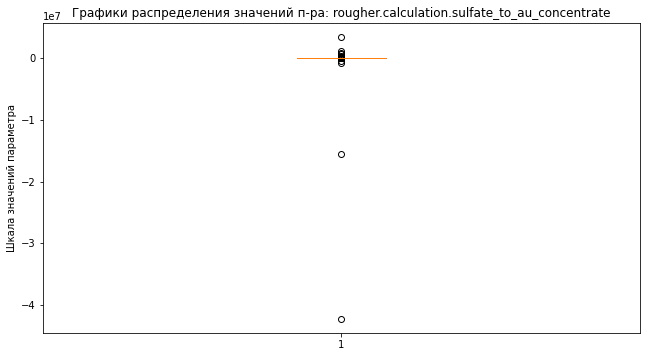

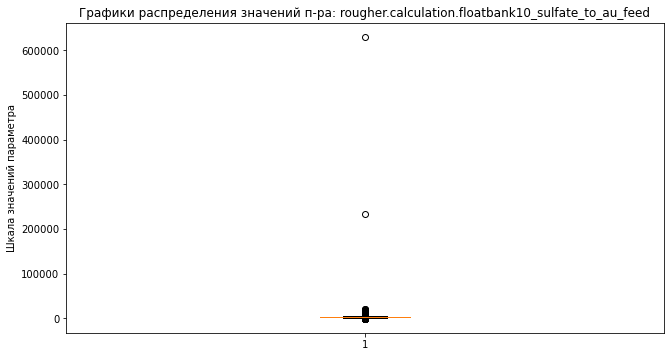

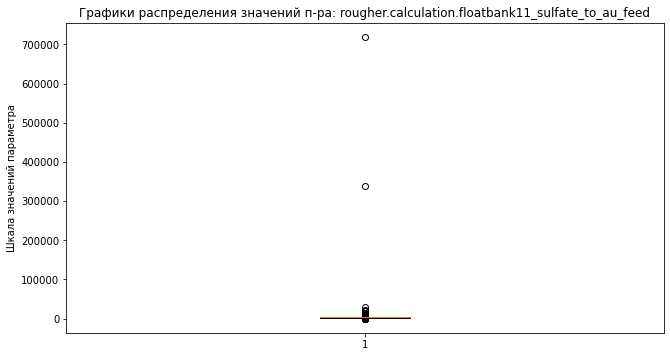

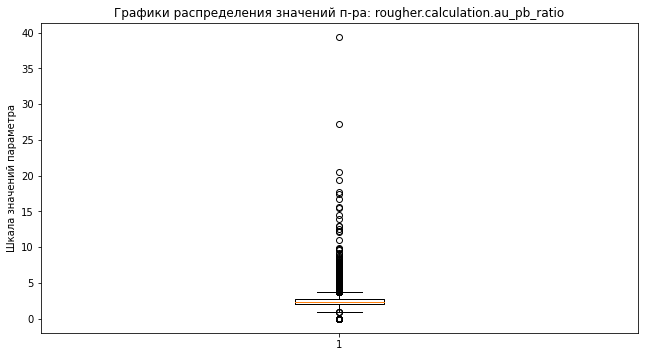

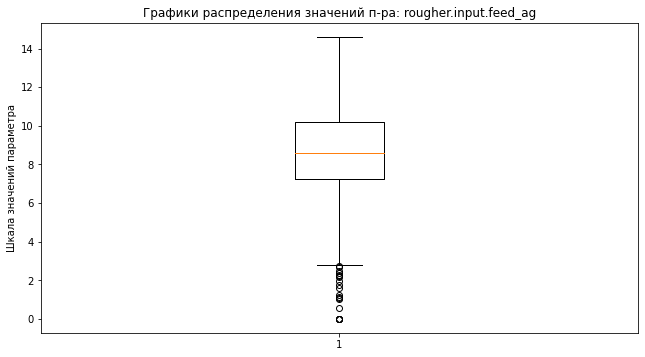

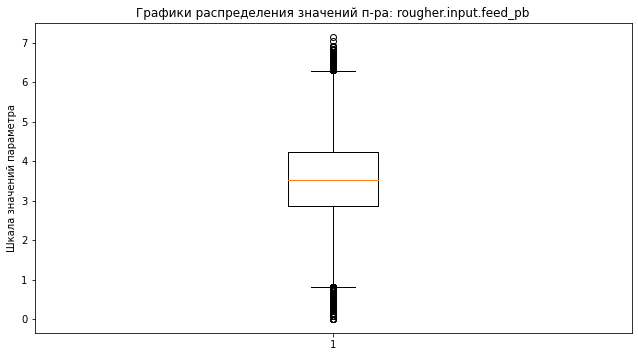

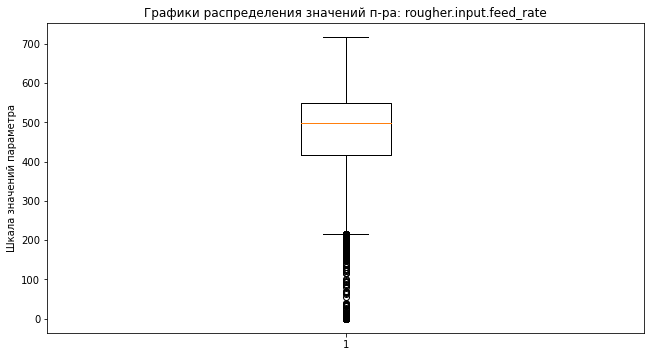

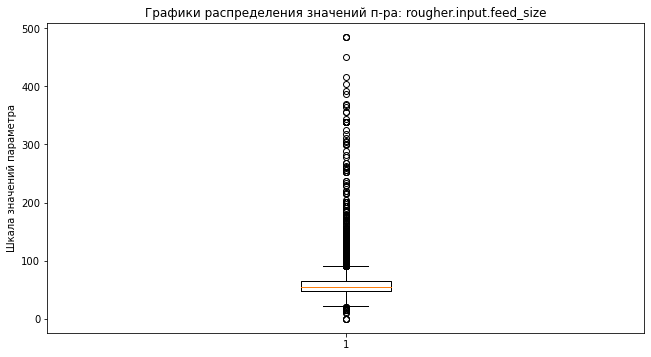

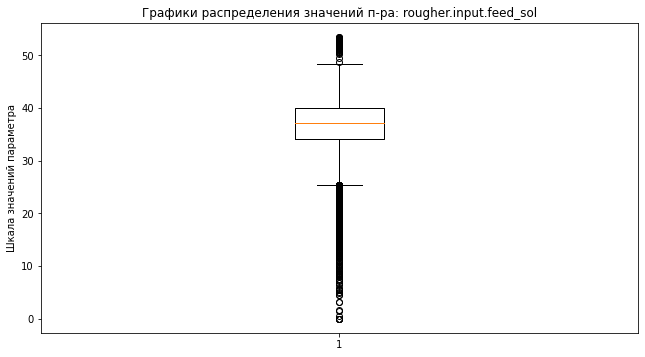

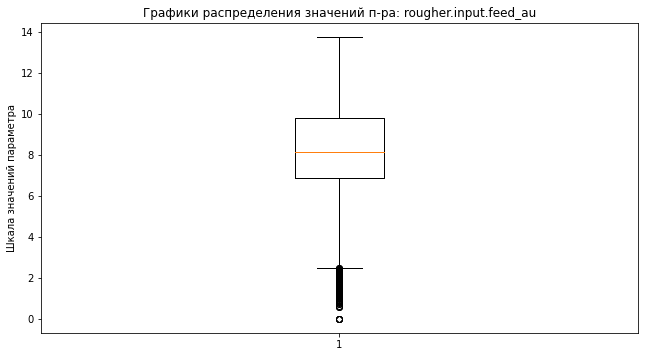

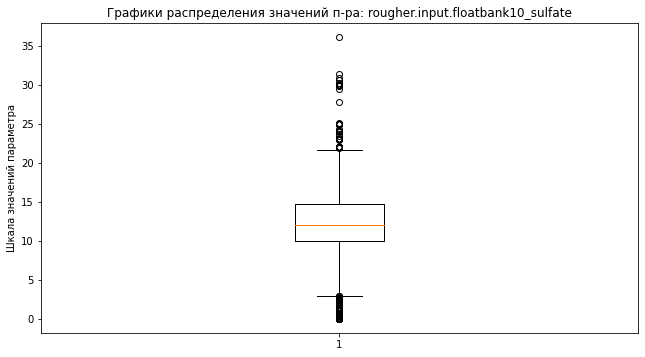

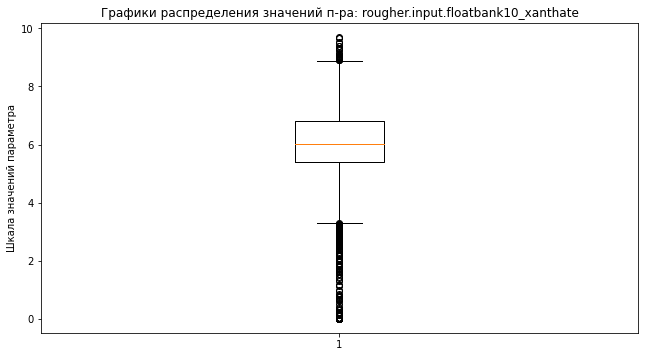

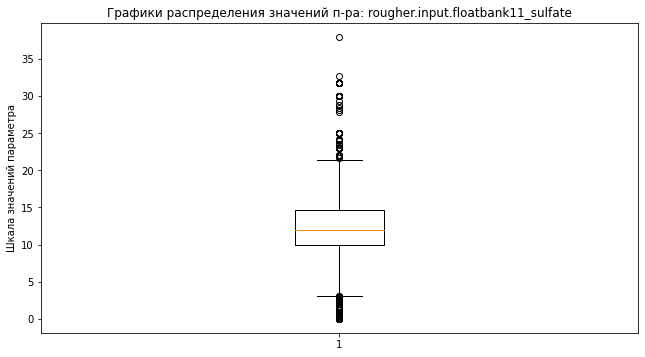

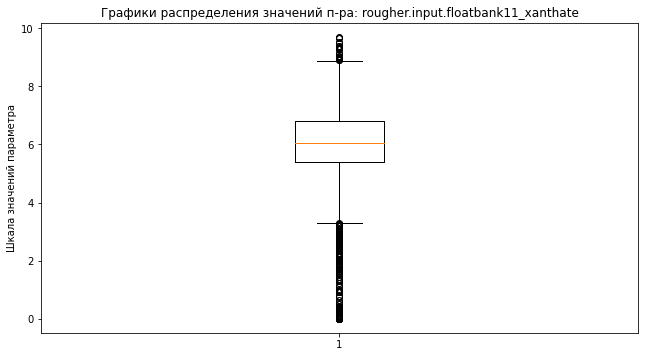

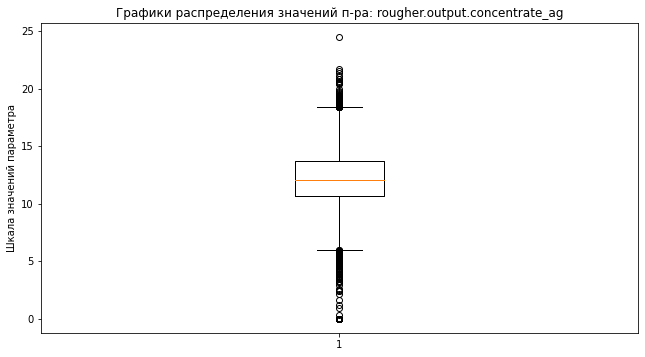

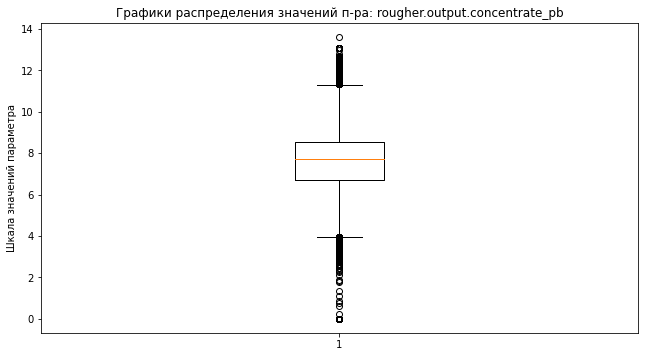

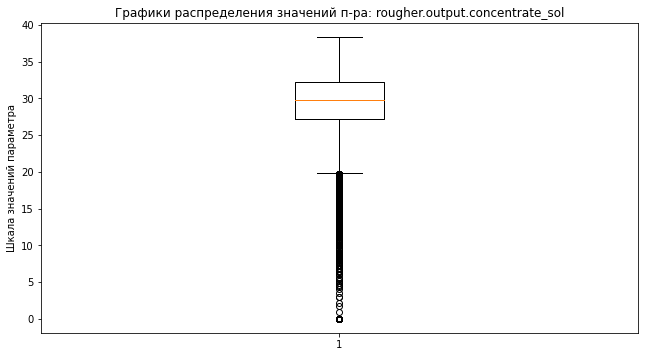

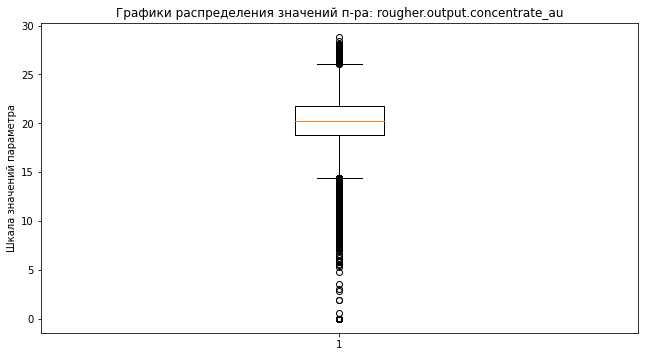

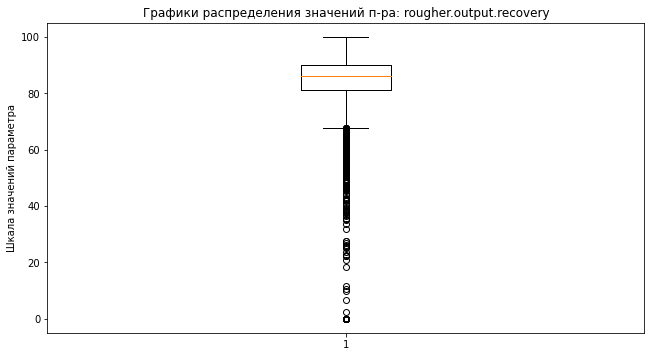

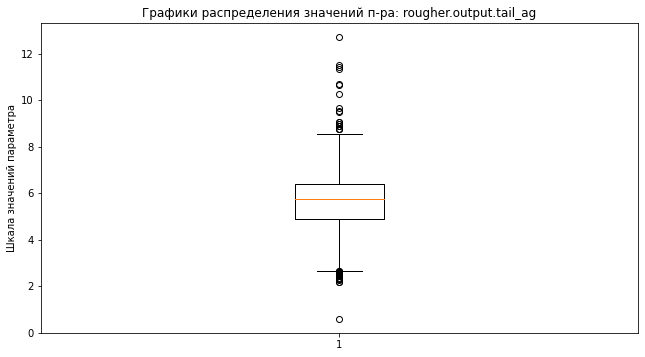

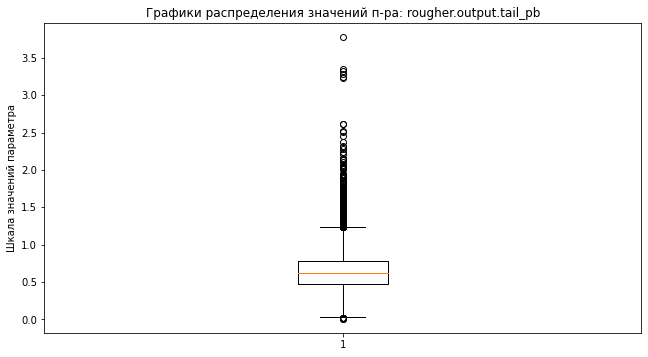

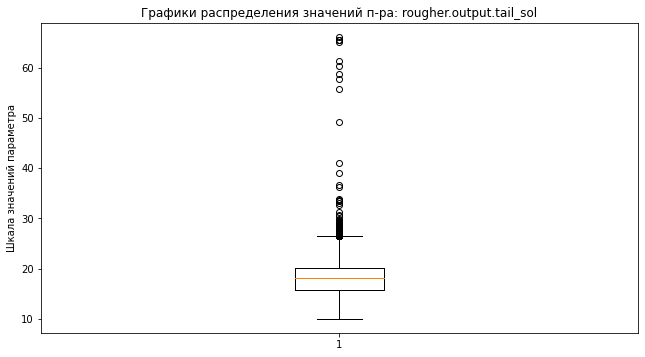

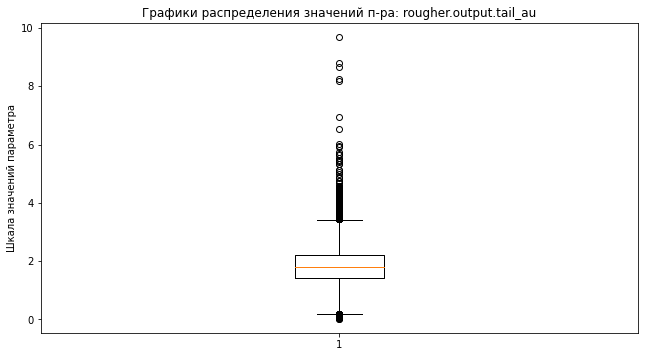

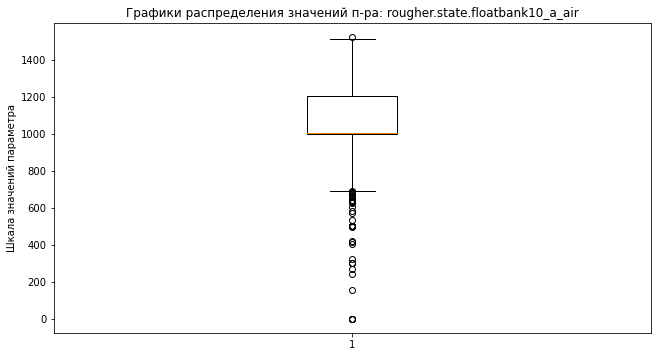

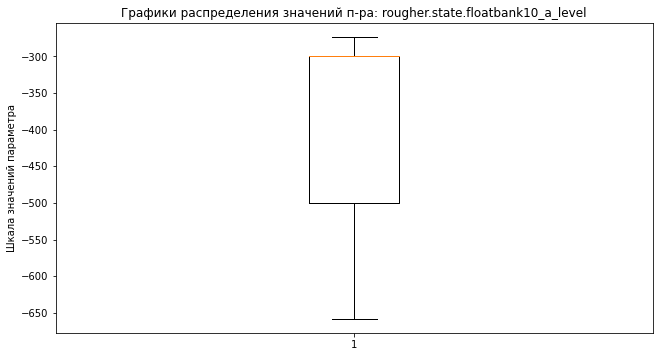

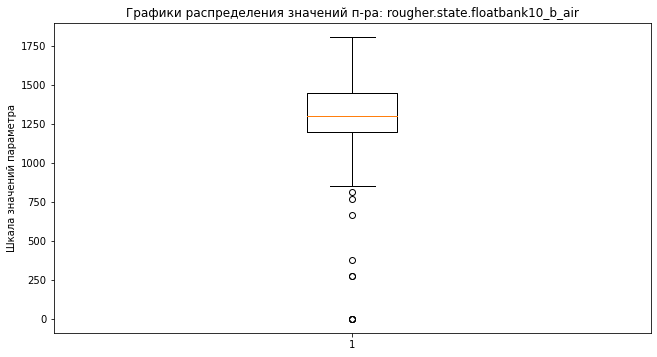

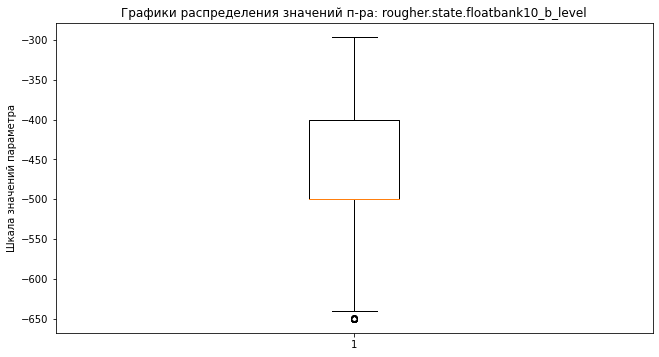

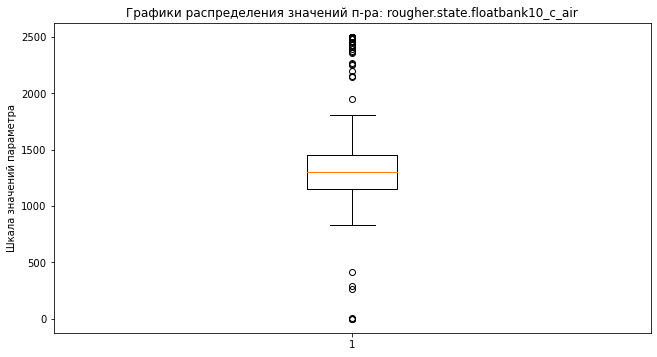

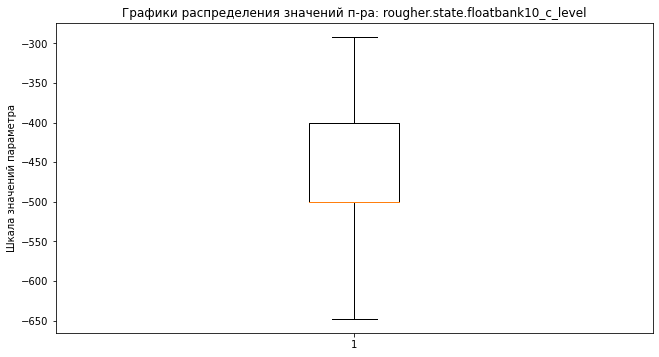

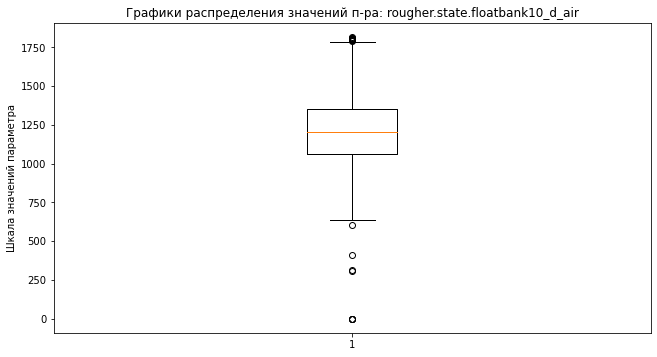

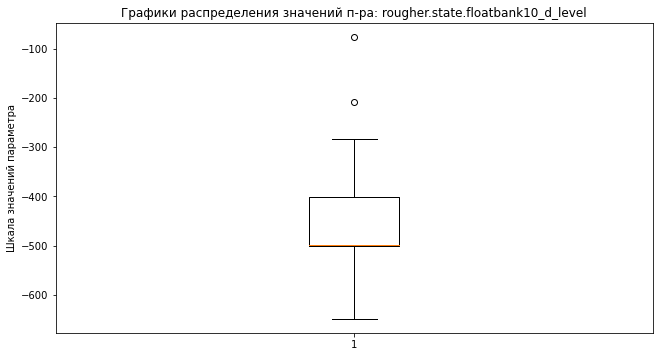

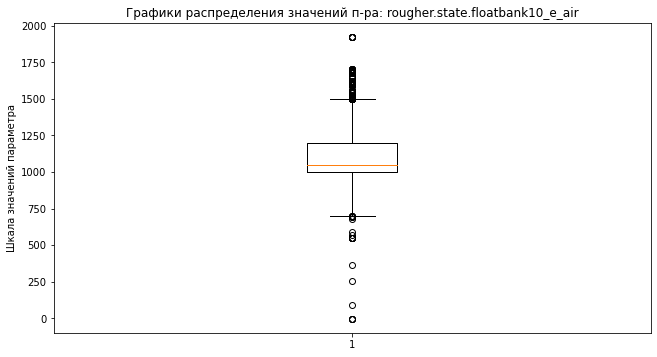

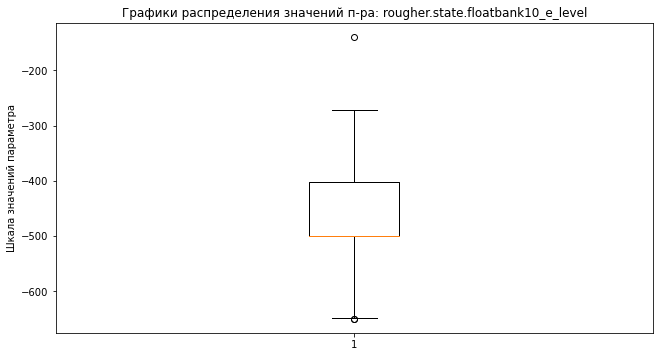

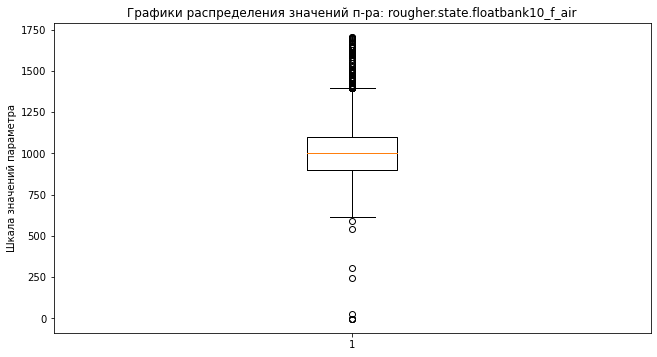

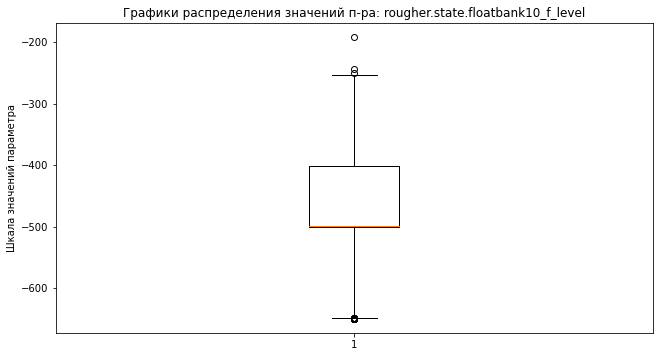

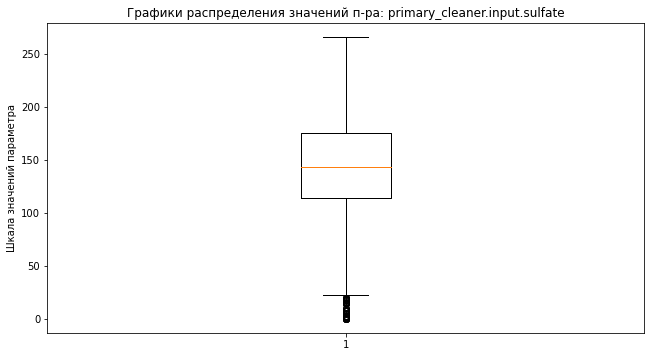

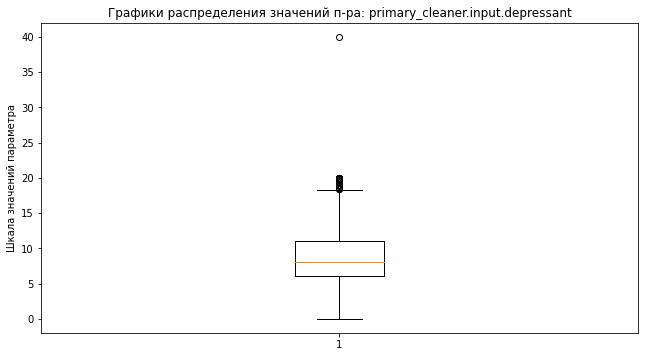

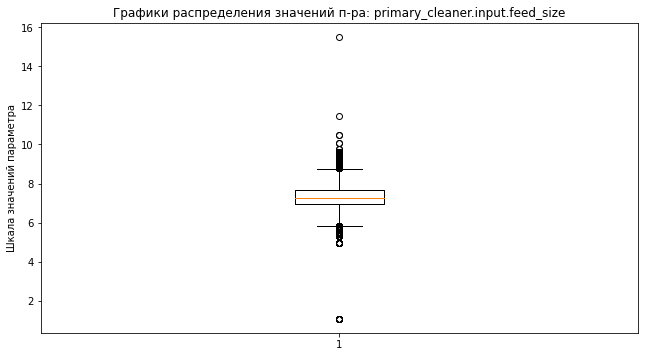

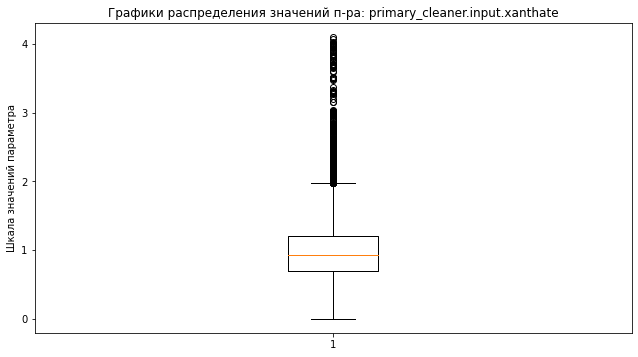

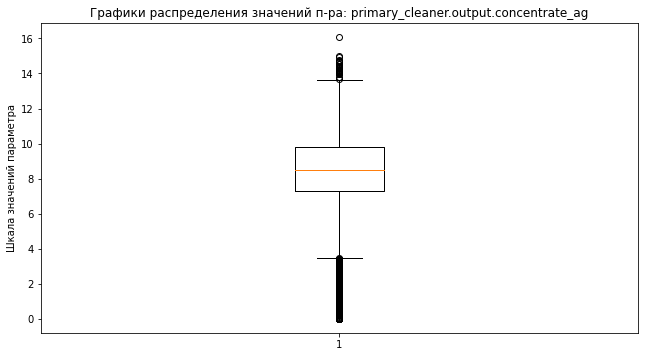

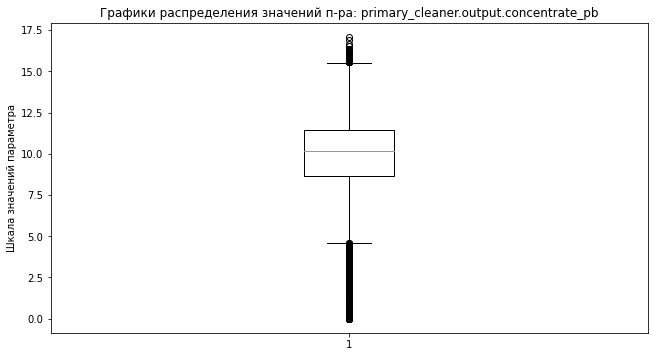

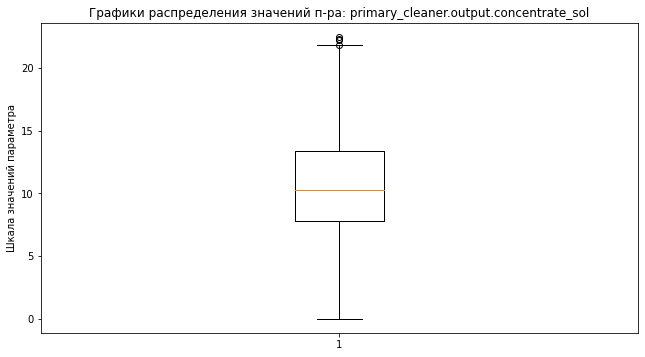

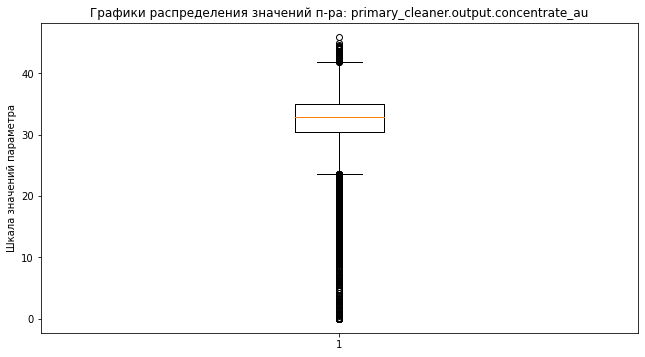

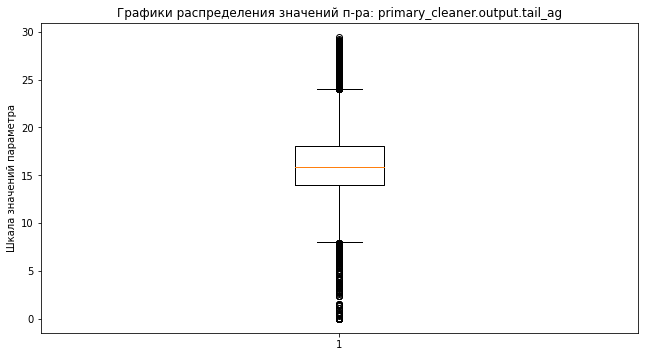

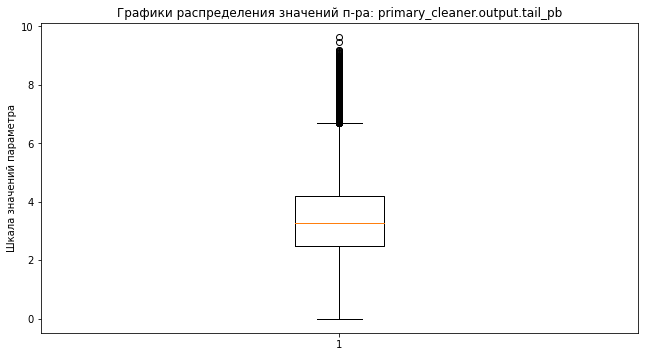

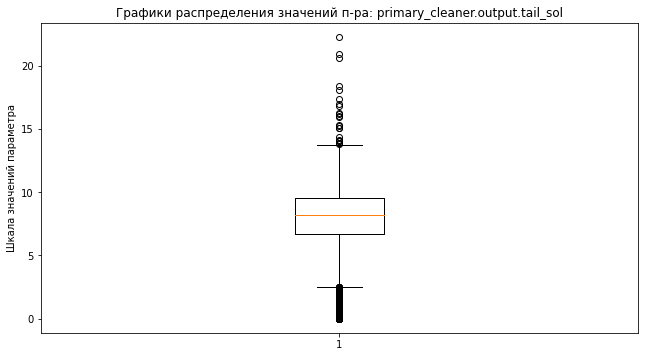

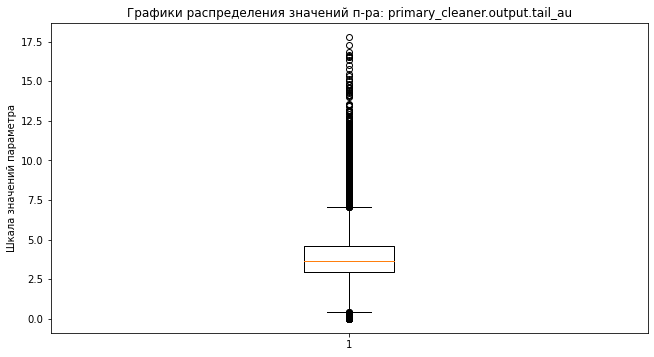

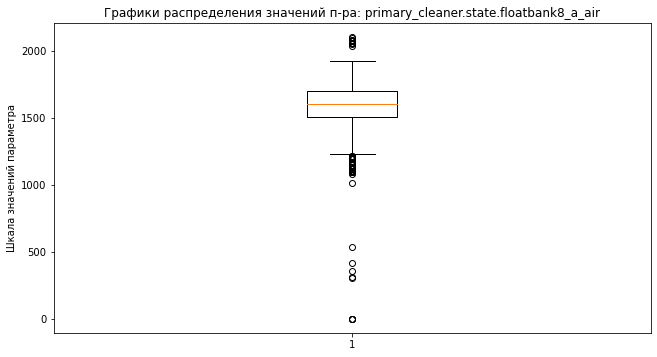

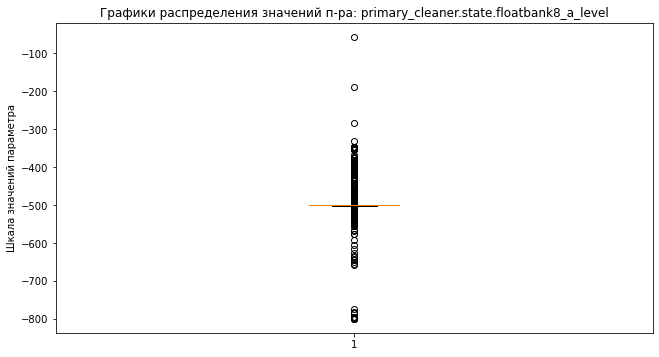

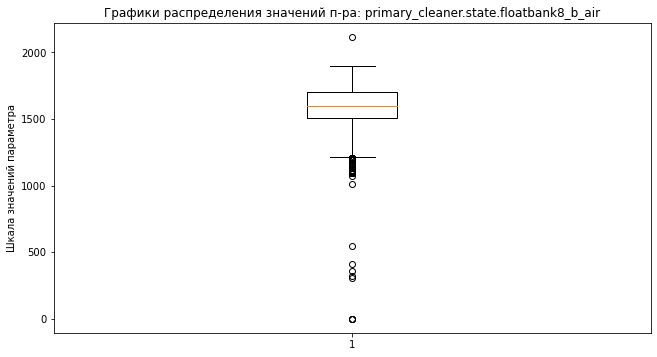

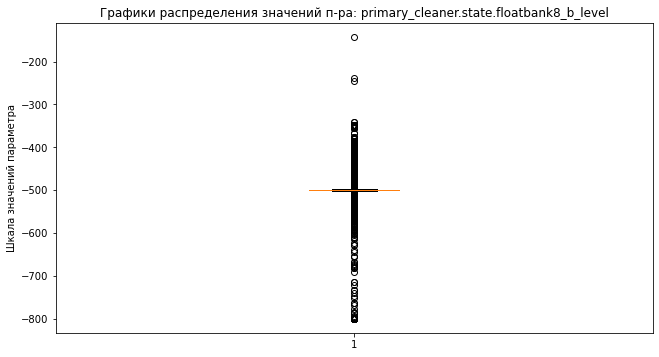

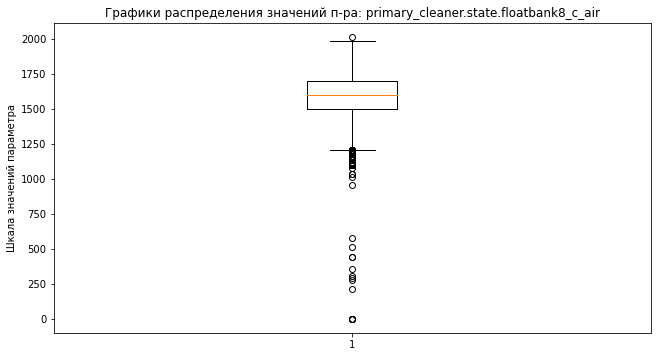

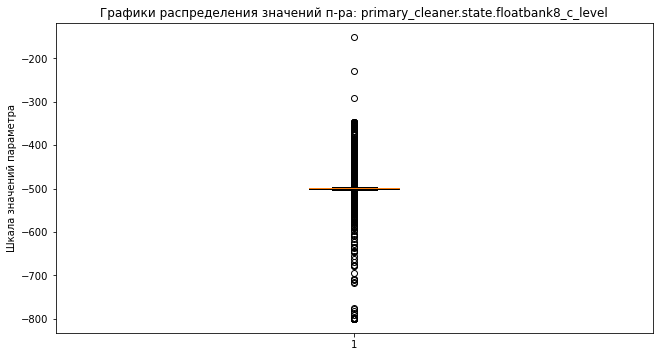

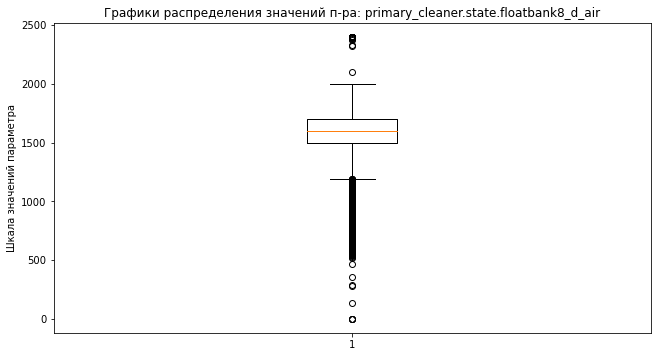

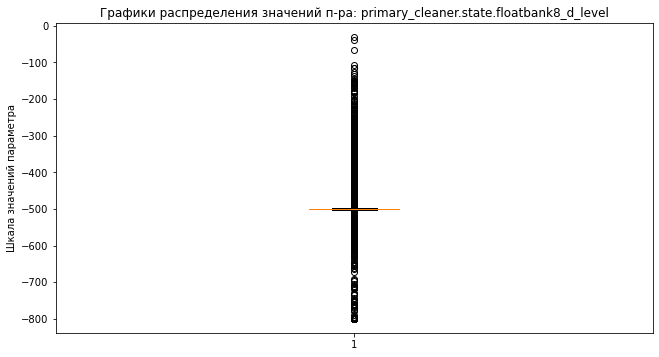

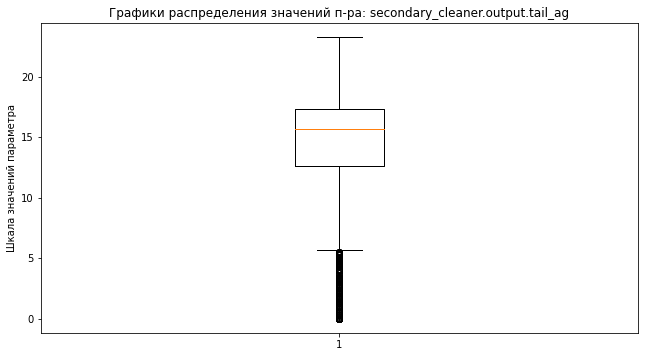

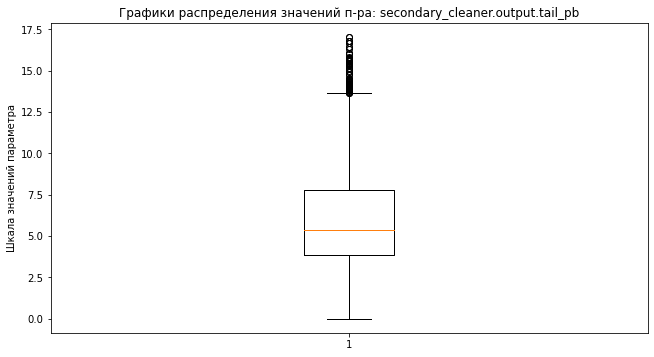

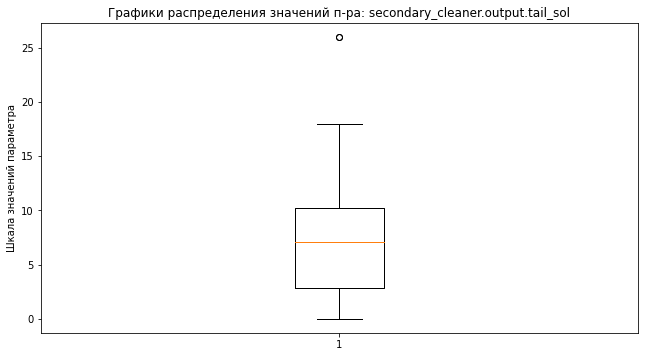

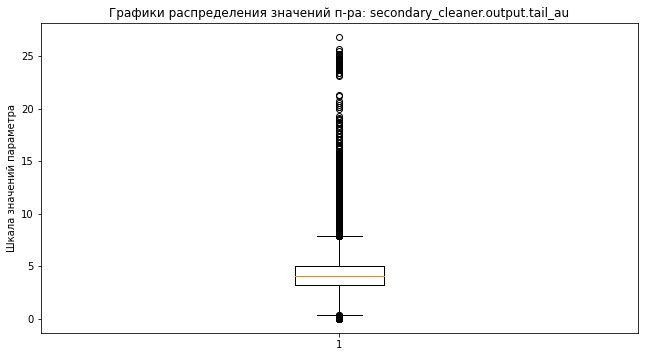

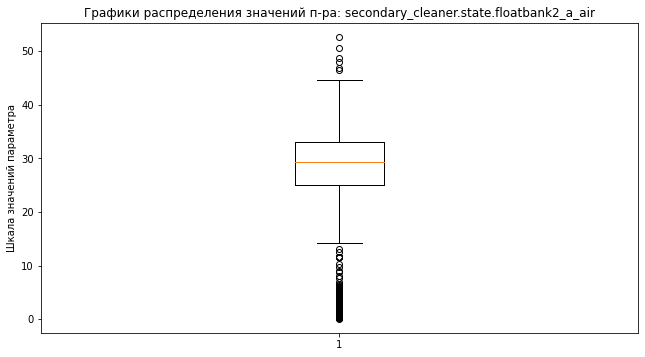

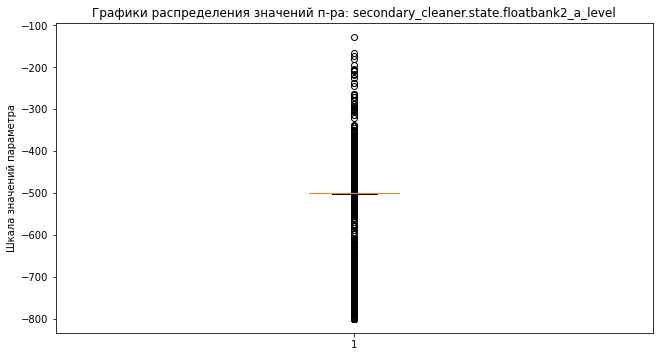

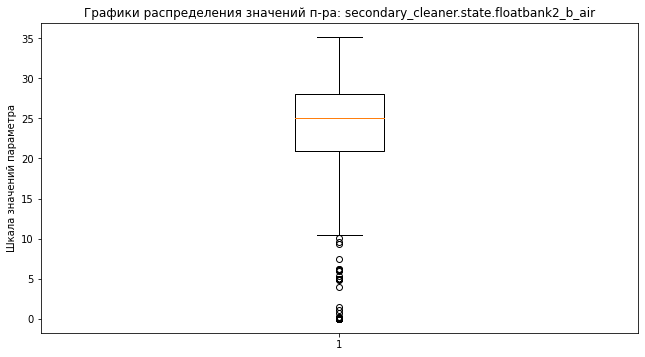

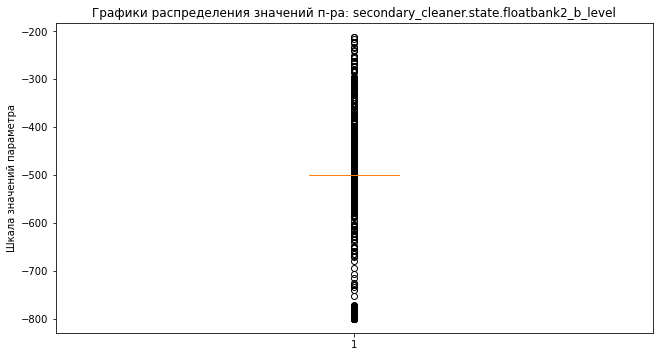

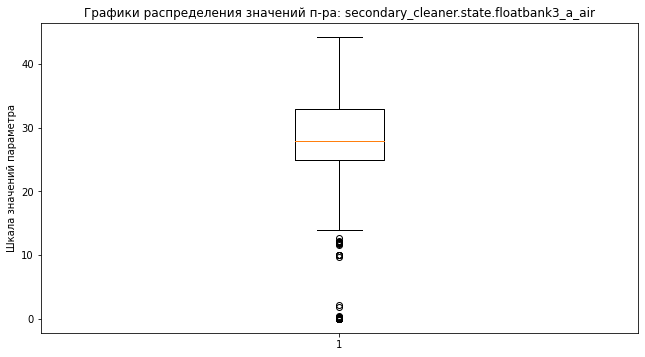

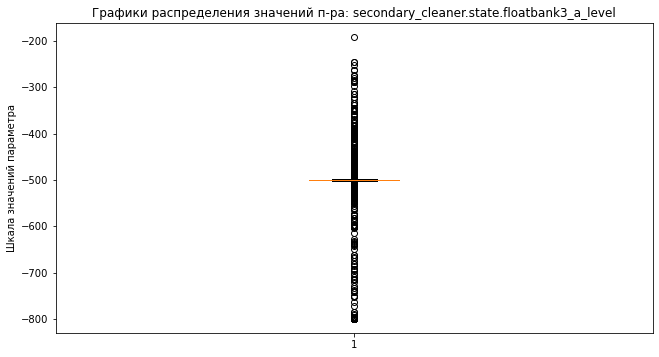

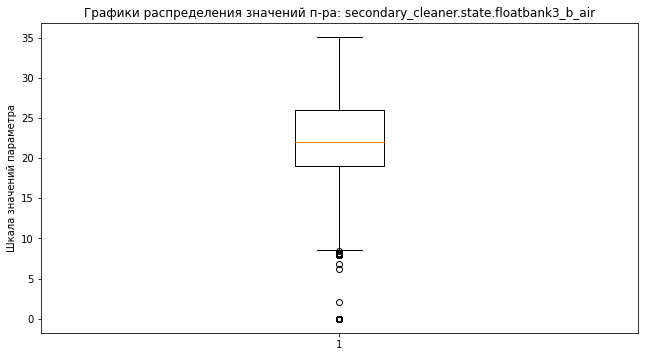

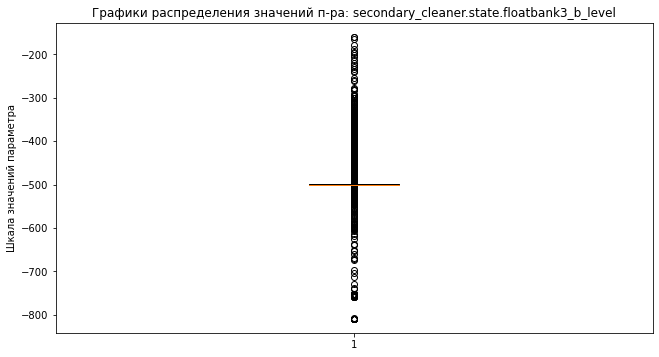

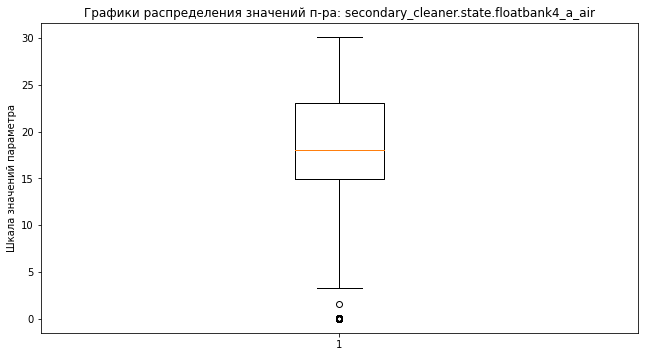

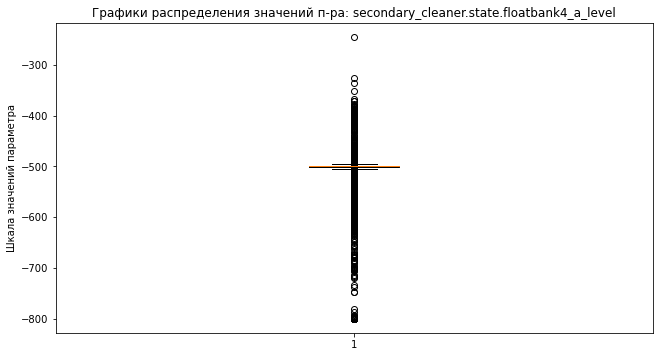

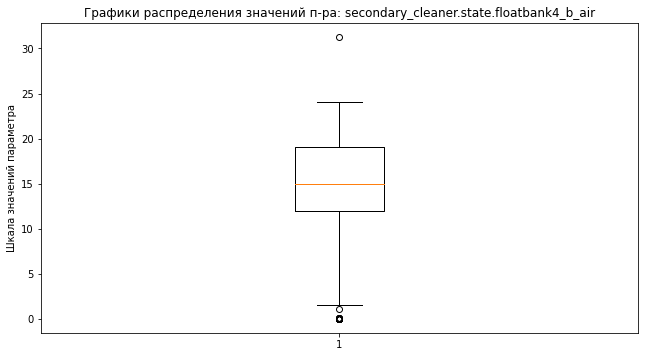

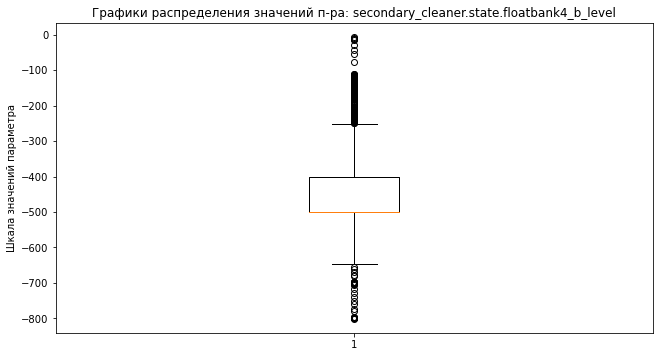

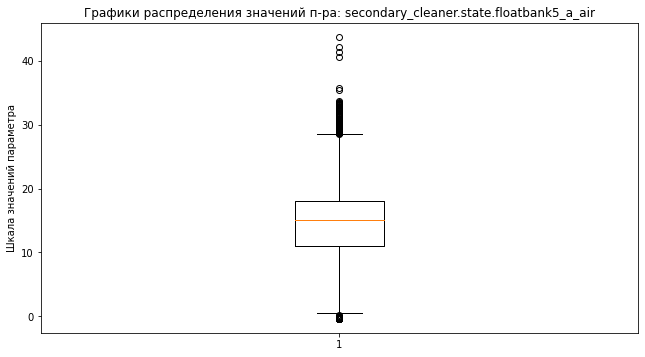

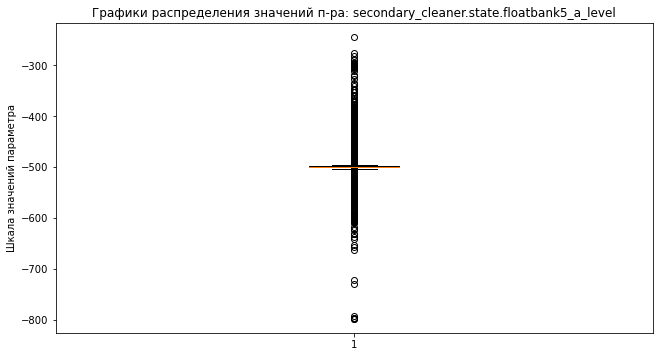

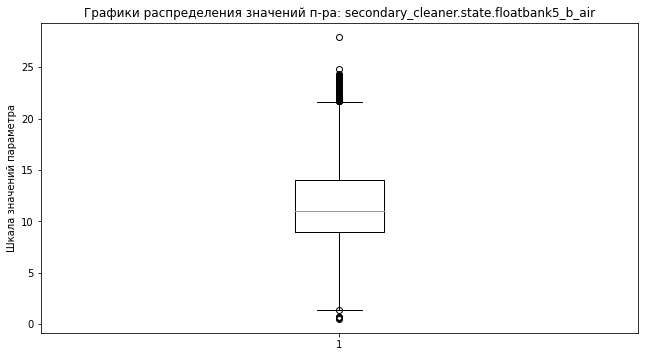

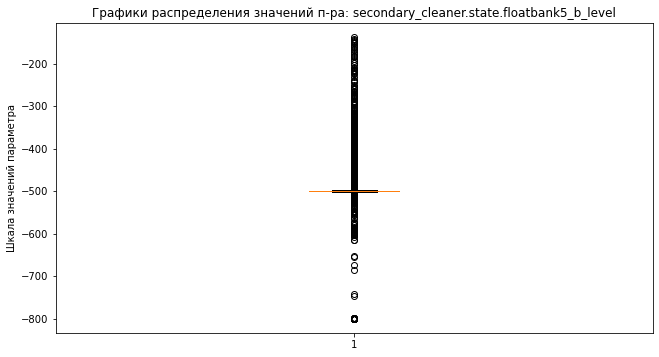

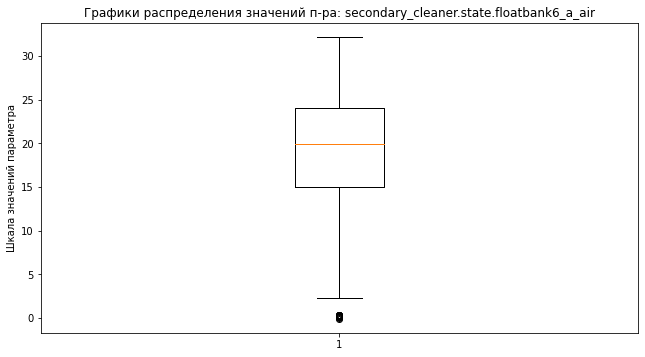

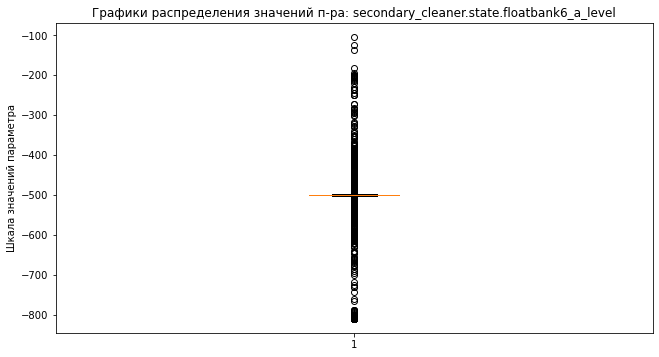

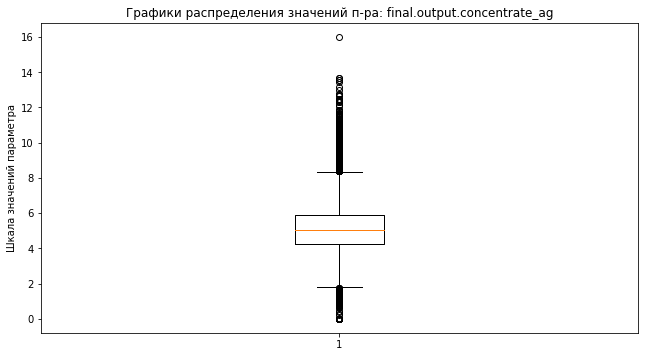

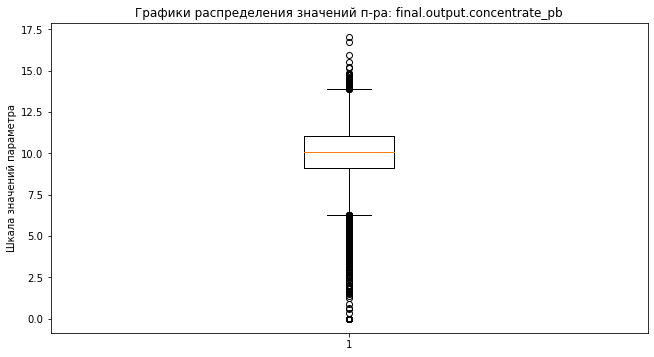

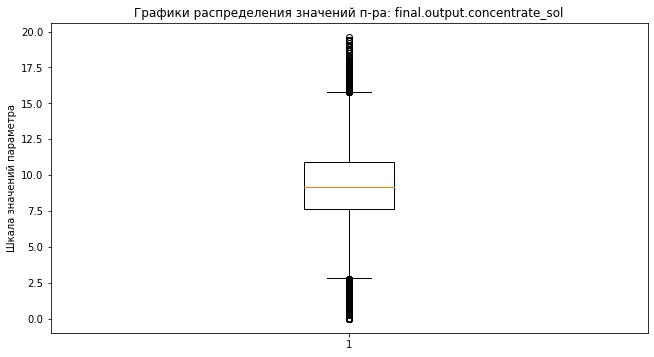

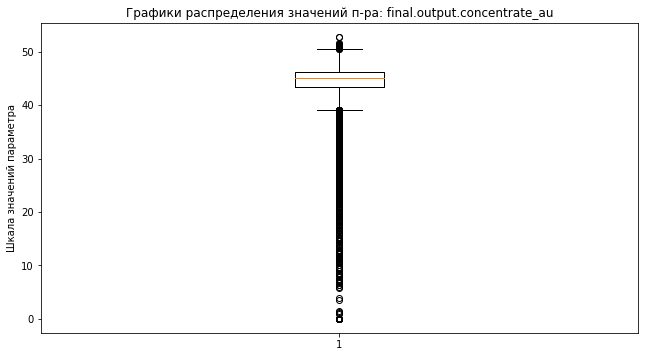

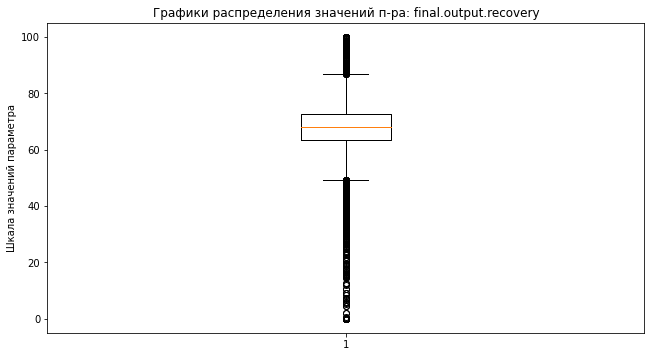

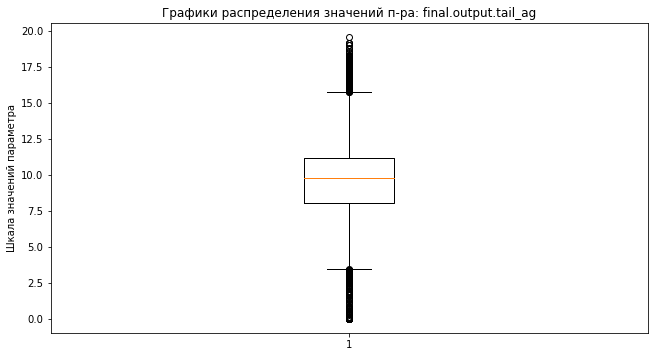

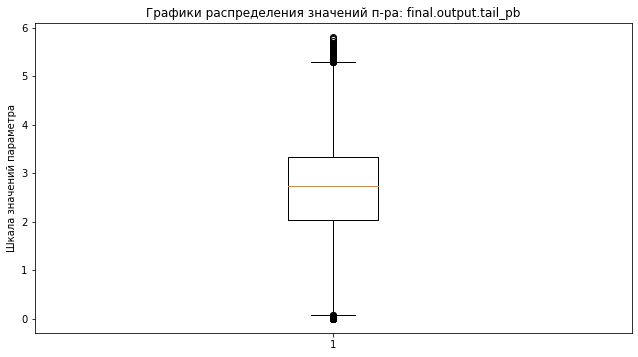

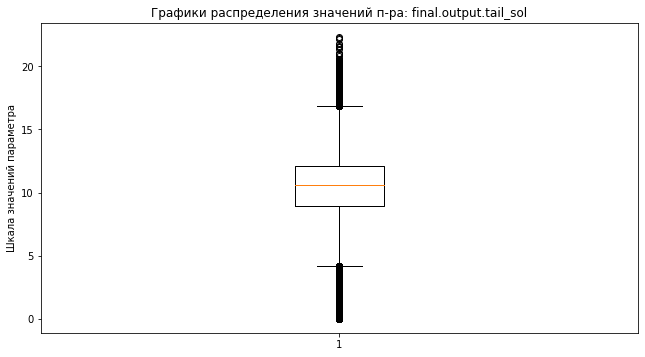

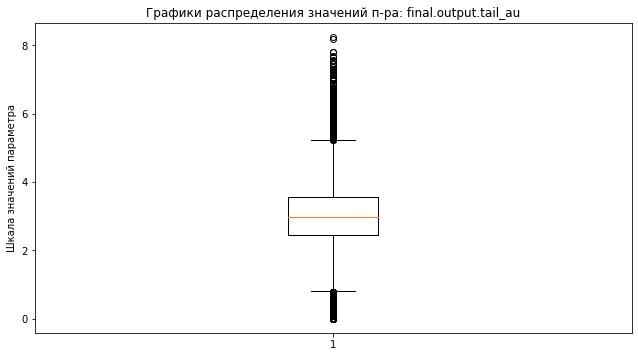

In [13]:
# визуализация распределения значений признаков в датафрейме
for col in new_columns[1:]:
    print('\n')
    plt.figure(figsize=(10.7, 5.7))
    plt.boxplot(df_full[col])
    plt.title('Графики распределения значений п-ра: ' + col)
    plt.ylabel('Шкала значений параметра')
    plt.show()

Удаление выбрасов и аномальный объектов.

In [14]:
# сбор индексов аномальных объектов
outlier_indexs = []
outlier_indexs.extend(df_full[df_full[new_columns[1]]  < -10000000].index)
outlier_indexs.extend(df_full[df_full[new_columns[2]]  > 100000].index)
outlier_indexs.extend(df_full[df_full[new_columns[4]]  > 25].index)
outlier_indexs.extend(df_full[df_full[new_columns[31]] > -220].index)
outlier_indexs.extend(df_full[df_full[new_columns[33]] > -200].index)
outlier_indexs.extend(df_full[df_full[new_columns[37]] > 30].index)
outlier_indexs.extend(df_full[df_full[new_columns[58]] > 20].index)

# вывод объектов
display(df_train[df_train['date'].isin(df_full.loc[outlier_indexs, 'date'].values)])
display(df_test[df_test['date'].isin(df_full.loc[outlier_indexs, 'date'].values)])

# удаление объектов
df_train = df_train[~df_train['date'].isin(df_full.loc[outlier_indexs, 'date'].values)]
df_test  = df_test[~df_test['date'].isin(df_full.loc[outlier_indexs, 'date'].values)]

,date,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,...,secondary_cleaner.state.floatbank6_a_level,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au
1603,2016-04-01 09:00:00,1.630361e+05,6785.167355,6785.808889,27.231374,7.183713,0.128727,180.243408,58.221271,4.592246,...,-500.121279,8.254964,7.972211,7.040814,43.818753,15.662743,11.107211,1.131023,5.198314,2.993891
2800,2016-06-06 14:59:59,1.365730e+05,234425.859727,337629.417668,2.164011,7.162982,3.001288,127.307510,55.162383,24.187259,...,-494.137420,3.132967,9.577148,8.264648,48.166565,46.550674,7.381221,2.456787,10.764648,3.703931
5502,2017-02-14 10:59:59,-1.548858e+07,2850.396632,2838.758150,2.918091,12.543719,3.904165,0.104660,49.560359,37.717159,...,-503.089031,7.773121,8.586045,15.525232,43.117968,74.052267,13.768095,3.219781,13.555201,3.675259
5503,2017-02-14 11:59:59,-4.223520e+07,2915.330708,2916.122754,3.050160,12.200535,3.634776,641.653710,51.960250,40.400951,...,-498.972818,7.463924,8.517581,14.834671,43.271072,75.376671,13.940405,3.180458,12.939978,3.383304
10763,2018-03-20 16:59:59,4.441849e+04,629638.977914,718684.955855,2.342689,4.996644,1.656195,543.446321,65.977005,28.592618,...,-499.736710,4.070744,9.269599,6.326217,39.068119,65.909224,6.366277,1.053045,6.412965,1.415349
11821,2018-05-10 22:59:59,3.022612e+04,2813.208649,2812.682223,39.379272,6.215747,0.088552,559.602438,78.728903,37.179536,...,-499.608800,6.973522,7.428810,8.744408,44.829760,73.729453,6.532566,0.310602,12.092456,0.971820


,date,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
488,2016-09-30 09:59:59,5.444711,1.789347,0.227490,43.591090,27.476165,4.130267,7.496731,0.026529,0.001869,...,1.202063e+01,-520.546407,9.959263e+00,-499.819236,10.029359,-497.636819,4.915472,-498.448790,19.989843,-496.473083
4868,2017-12-12 02:59:59,9.077845,1.473546,599.316682,67.276593,49.509066,8.119952,10.566949,5.179631,10.563506,...,2.001224e+01,-501.214085,1.503666e+01,-499.961591,10.934830,-499.869979,8.031325,-499.884374,11.977709,-498.366441
4869,2017-12-12 05:59:59,4.658959,0.917877,650.645906,80.218408,26.812950,4.614860,13.923495,7.044068,13.925560,...,1.998160e+01,-498.764033,1.500618e+01,-501.338755,10.943969,-499.837690,7.962367,-500.161187,11.981267,-500.657063
5184,2017-12-27 10:59:59,11.450708,5.413574,521.073091,65.574392,41.058594,11.629298,14.310819,0.015914,0.005890,...,2.706261e-10,-799.798523,2.030172e-10,-800.836914,0.069227,-796.857296,0.528083,-800.220337,-0.079426,-742.843140
5185,2017-12-27 11:59:59,11.450708,5.413574,521.073091,65.574392,41.058594,11.629298,14.310819,0.004386,0.005890,...,3.265143e+00,-799.427634,1.080343e+00,-799.879409,0.200600,-797.323986,1.420606,-800.118587,0.016815,-789.840007


<a id='section_5'></a>
**Итог:** **Дубликаты** любых видов - отсутствуют.

Значения для заполнения **пропусков** брались из ближайшего (по времени) объекта, в пределах одной партии руды. Этот способ несёт в себе наименьшие отклонения нежели заполнение средним или медианным значением.

Присутствуют **выбросы** - крайне нетепичные объекты, значения которых выбиваются далеко за рамки нормального распределения. Среди большого количества золотой руды изредка встречаются самородки, которые могу создавать подобный эффект. Эти объекты отобраны, и при необходимости могут быть удалены. К примеру, в случае низкой точности предсказаний модели.
___

## Анализ данных

### Изменения концентраций металлов на различных этапах очистки

Выделение данных о концентраци металлов, по отдельности:

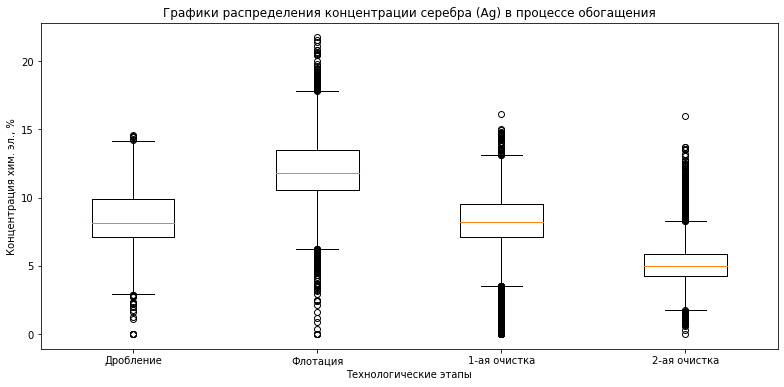

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
...,...,...,...,...
13792,5.970515,8.523497,7.128896,3.109998
13793,6.048130,11.658799,7.490444,3.367241
13794,6.158718,11.959486,7.537584,3.598375


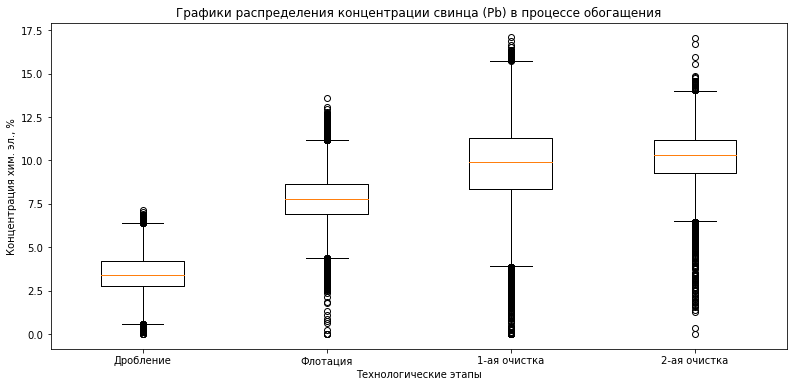

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
...,...,...,...,...
13792,4.020002,8.955135,12.633558,11.434366
13793,3.902537,10.655377,12.012378,11.625587
13794,3.875727,10.702148,11.650285,11.737832


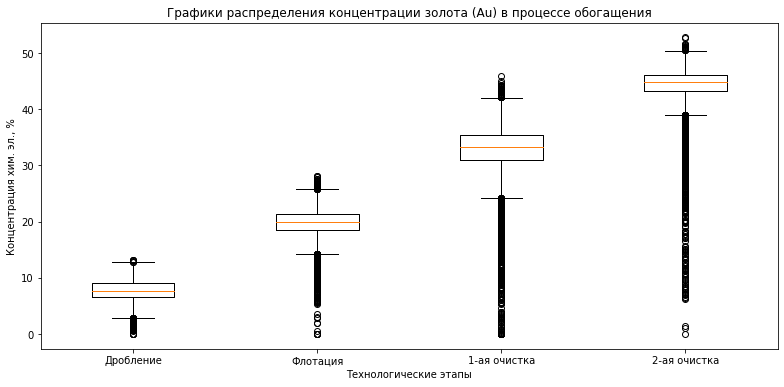

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
...,...,...,...,...
13792,4.525061,15.111231,31.856742,46.795691
13793,4.362781,17.834772,30.770892,46.408188
13794,4.365491,17.804134,30.356618,46.299438


In [37]:
# серебро(Ag)
concentr_ag = df_train[['rougher.input.feed_ag',
                        'rougher.output.concentrate_ag',
                        'primary_cleaner.output.concentrate_ag',
                        'final.output.concentrate_ag']]
# свинец (Pb)
concentr_pb = df_train[['rougher.input.feed_pb',
                        'rougher.output.concentrate_pb',
                        'primary_cleaner.output.concentrate_pb',
                        'final.output.concentrate_pb']]
# золото (Au)
concentr_au = df_train[['rougher.input.feed_au',
                        'rougher.output.concentrate_au',
                        'primary_cleaner.output.concentrate_au',
                        'final.output.concentrate_au']]

# последовательные изображения концентраций металлов
for concentrate_metal, metal in zip([concentr_ag, concentr_pb, concentr_au], ['серебра (Ag)', 'свинца (Pb)', 'золота (Au)']):
    print('\n')
    plt.figure(figsize=(13.2, 6))
    plt.boxplot(concentrate_metal, labels = ['Дробление', 'Флотация', '1-ая очистка', '2-ая очистка'])
    plt.title('Графики распределения концентрации ' + metal + ' в процессе обогащения')
    plt.ylabel('Концентрация хим. эл., %')
    plt.xlabel('Технологические этапы')
    plt.show()
    display(concentrate_metal)

In [16]:
# аномальный объект с черезвычайно высокой конц. серебра (Ag)
display(df_train[df_train['rougher.output.concentrate_ag'] > 23])
df_train.drop(df_train[df_train['rougher.output.concentrate_ag'] > 23].index, inplace=True)

,date,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,...,secondary_cleaner.state.floatbank6_a_level,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au
3758,2016-07-23 09:59:59,157.55862,11334.68629,8803.586833,2.330075,8.842555,3.486392,2.853089,22.407377,38.863364,...,-492.411938,7.248355,9.808717,8.234218,28.846649,17.617817,10.113911,3.302865,6.072179,7.041729


In [17]:
# аномальный объект с нулевой концентрацией золота (Au)
for col in concentr_au.columns:
    display(df_train[df_train[col] == 0])
    df_train.drop(df_train[df_train[col] == 0].index, inplace=True)    

,date,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,...,secondary_cleaner.state.floatbank6_a_level,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au


,date,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,...,secondary_cleaner.state.floatbank6_a_level,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au


,date,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,...,secondary_cleaner.state.floatbank6_a_level,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au
19,2016-01-15 19:00:00,41959.818540,3507.941540,3499.552368,2.448851,6.046063,2.777324,571.766992,62.823127,40.381002,...,-600.140776,5.658943,10.436002,5.942418,42.509402,70.348300,10.232392,1.174845,19.498566,2.272460
22,2016-01-15 22:00:00,42082.414968,3506.178699,3501.343118,2.617243,5.599324,2.525838,571.140653,64.816398,41.302359,...,-600.054998,6.118749,10.483007,6.546983,41.406172,69.823900,10.322077,1.270956,19.384247,2.245145
30,2016-01-16 06:00:00,41974.790294,3501.482821,3497.994338,2.600945,5.689557,2.508414,583.537789,64.616077,43.042457,...,-600.315548,5.322681,9.577672,4.805490,44.059908,69.193840,10.334312,1.406355,19.923319,2.239310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,2018-01-31 12:59:59,45028.737035,2503.769376,2503.540659,2.211670,13.325236,5.474456,371.472999,35.946682,35.630662,...,-500.484293,6.137303,10.105221,8.836956,45.294555,72.130539,14.596224,3.702168,9.760608,4.180376
9859,2018-02-03 01:59:59,44992.103457,2498.231210,2498.554761,2.150317,13.083709,5.715880,442.745779,57.160552,37.865724,...,-501.764257,6.908167,10.288687,10.131302,43.902258,69.853454,13.838360,3.800475,11.336795,4.606074
9943,2018-02-08 15:59:59,30018.804591,2494.237523,2494.417947,2.944543,9.891331,3.108644,524.641085,101.617518,38.032078,...,-499.146128,5.539720,10.440730,8.601667,47.283620,70.718302,10.466087,1.604674,12.371752,3.105455


,date,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,...,secondary_cleaner.state.floatbank6_a_level,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au


<a id='section_6'></a>
**Вывод:**

Медианна концентрация **серебра** в материале уменьшилась с 12,5% до 5%. В процессе обогощения материала, значения сосредотачиваются в меньшем диапазоне. Значения величины на каждом этапе распределены нормально, присутствуют выбросы с обеих сторон, смещение - незначительное. На этапе _вторичной очистки_ выбросы сверху расположены в большом диапазон значений, относительно нижнего.

Медианная концентрация **свинца** в материале увеличилась с 7,6% до 10,1%. Значения величины на каждом этапе распределены нормально, присутствуют выбросы с обеих сторон, смещение - незначительное. На этапе _первичной очистки_ увеличивается диапазон  значений концентраци, относительно предыдущего этапа.

Медианная концентрация **золота** в материале увеличилась с 20% до 45%. Значения величины на каждом этапе распределены нормально, размер диапазона большинства значения, практически, не меняется. В процессе обогощения материала, увеличивается количество выбросов снизу.

Можно предположить, что некоторые **низкоконцентрированные золотые руды** проходят полцый цикл очистки от начала до конца, из чего следует низкая конверсия.
___

### Сравнение размеров гранул материала

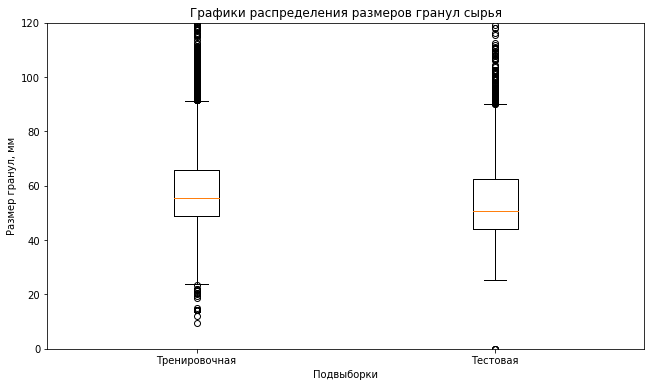

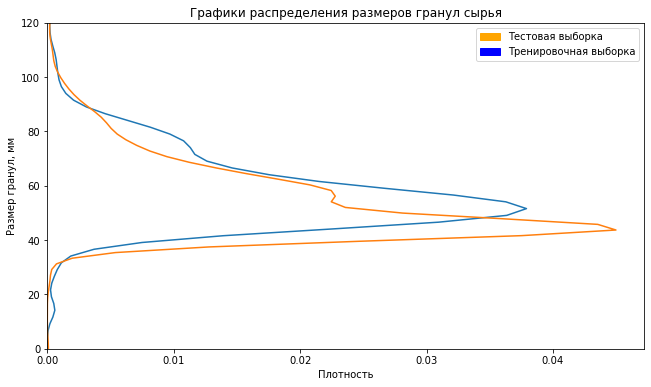

In [38]:
# исходное сырьё
plt.figure(figsize=(10.7, 6))
plt.boxplot([df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']], labels = ['Тренировочная', 'Тестовая'])
plt.title('Графики распределения размеров гранул сырья')
plt.ylabel('Размер гранул, мм')
plt.xlabel('Подвыборки')
plt.ylim(0 , 120)
plt.show()

# график распределения плотности КВЗ
plt.figure(figsize=(10.7, 6))
sns.kdeplot(data=df_train, y='rougher.input.feed_size')
sns.kdeplot(data=df_test, y='rougher.input.feed_size')
orange_patch = mpatches.Patch(color='orange', label='Тестовая выборка')
blue_patch = mpatches.Patch(color='blue', label='Тренировочная выборка')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Графики распределения размеров гранул сырья')
plt.ylabel('Размер гранул, мм')
plt.xlabel('Плотность')
plt.ylim(0 , 120)
plt.show()

In [19]:
# аномалии в тестовой выборке
df_test[df_test['rougher.input.feed_size'] < 1]

,date,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4216,2017-11-14 07:59:59,9.589963,3.095897,588.724015,0.046369,41.252666,8.901142,14.226442,8.033570,14.212990,...,16.999138,-500.973904,10.111212,-499.170039,10.978363,-500.977127,9.019991,-500.611742,15.999272,-501.737309
4217,2017-11-14 08:59:59,9.662069,2.851009,581.645422,0.049194,41.574661,8.802743,14.372039,7.995283,14.364086,...,16.921640,-499.987269,10.105681,-500.304910,10.944729,-499.351885,8.981149,-499.591153,15.991976,-500.274198
4218,2017-11-14 09:59:59,9.459049,2.623066,626.269195,0.052019,41.654860,8.659767,14.681185,7.809586,14.692154,...,16.980869,-501.222119,10.094691,-500.210987,10.921166,-500.351705,9.016428,-499.226585,16.010202,-500.825685
4219,2017-11-14 10:59:59,9.509861,2.655166,647.711814,0.054843,42.688724,8.833995,15.445348,7.798026,15.444036,...,16.993188,-499.746519,10.077406,-499.896170,10.939057,-500.221118,9.027203,-500.486214,15.998822,-500.390437


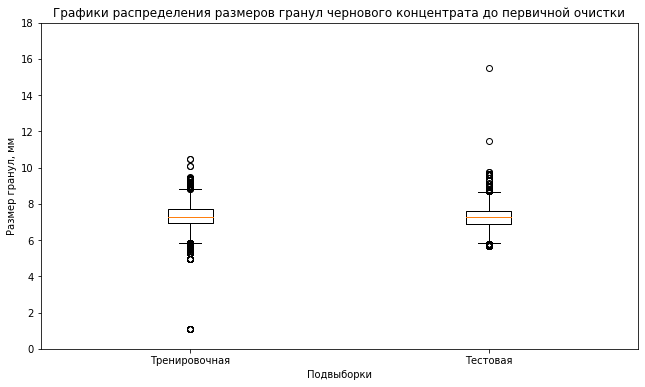

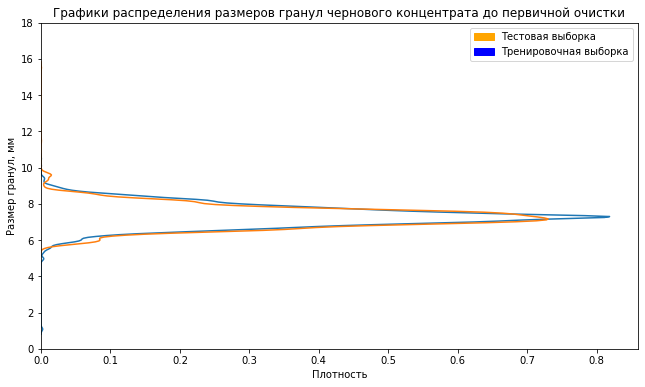

In [20]:
# черновой концентрат
plt.figure(figsize=(10.7, 6))
plt.boxplot([df_train['primary_cleaner.input.feed_size'], df_test['primary_cleaner.input.feed_size']],
            labels = ['Тренировочная', 'Тестовая'])
plt.title('Графики распределения размеров гранул чернового концентрата до первичной очистки')
plt.ylabel('Размер гранул, мм')
plt.xlabel('Подвыборки')
plt.ylim(0, 18)
plt.show();

# график распределения плотности КВЗ
plt.figure(figsize=(10.7, 6))
sns.kdeplot(data=df_train, y='primary_cleaner.input.feed_size')
sns.kdeplot(data=df_test, y='primary_cleaner.input.feed_size')
orange_patch = mpatches.Patch(color='orange', label='Тестовая выборка')
blue_patch = mpatches.Patch(color='blue', label='Тренировочная выборка')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Графики распределения размеров гранул чернового концентрата до первичной очистки')
plt.ylabel('Размер гранул, мм')
plt.xlabel('Плотность')
plt.ylim(0 , 18)
plt.show()

In [21]:
# аномалии
display(df_train[df_train['primary_cleaner.input.feed_size'] < 2])
df_train.drop(df_train[df_train['primary_cleaner.input.feed_size'] < 2].index, inplace=True)

display(df_test[df_test['primary_cleaner.input.feed_size'] > 11])
df_test.drop(df_test[df_test['primary_cleaner.input.feed_size'] > 11].index, inplace=True)

,date,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,...,secondary_cleaner.state.floatbank6_a_level,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au
12891,2018-06-30 16:59:59,34991.889384,2819.221974,2818.660038,1.383913,7.066535,6.204006,550.021459,84.757676,37.683318,...,-512.226559,4.996623,13.610783,7.568243,43.744024,72.649096,10.130270,3.260226,7.539991,2.738827
12892,2018-06-30 17:59:59,36119.893296,2853.828537,2854.367139,1.170387,6.194067,6.182636,549.727685,83.867491,37.406831,...,-510.461699,4.574847,14.186702,7.110141,40.247859,77.350459,9.685243,3.268696,7.887629,1.903676
12893,2018-06-30 18:59:59,38418.248859,2845.132361,2844.343440,1.308251,5.743031,4.698552,536.169205,79.643663,36.784324,...,-506.277240,4.285103,15.160977,6.587767,40.031309,72.712568,9.540767,3.411264,8.372278,1.888141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,2018-06-30 21:59:59,38001.008774,2790.980561,2791.058256,1.215877,5.797734,4.648364,550.244392,81.798425,37.384373,...,-500.198266,3.528714,11.754941,6.821906,45.969441,67.593222,9.184660,2.881992,7.714569,1.997588
12897,2018-06-30 22:59:59,38042.205978,2780.193123,2780.155334,1.093242,6.136362,5.666884,550.258708,78.817179,36.753538,...,-499.833628,3.645653,11.817997,6.618848,45.475112,69.975163,9.308980,3.124010,7.530654,2.056132
12898,2018-06-30 23:59:59,40827.927781,2795.847010,2795.952806,1.166637,5.899956,5.498788,550.004338,79.741154,35.889279,...,-499.523399,3.766836,12.926176,6.517973,44.345347,66.890537,9.645720,3.620360,7.430309,2.351550


,date,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4979,2017-12-17 15:59:59,11.961905,4.744141,450.190205,44.263115,39.149099,11.206396,11.754310,4.995979,11.753050,...,0.045168,-798.615901,2.489718e-17,-799.074015,11.023870,-499.240218,7.94461,-499.970086,12.011728,-499.970207
4980,2017-12-17 16:59:59,12.310330,5.019965,459.033153,44.605219,39.083876,11.902704,12.740811,5.327963,12.726174,...,0.037587,-798.835241,2.489718e-17,-799.232116,10.993079,-480.207286,5.76757,-499.192156,12.023611,-500.100514


**Вывод:** Графики имеют схожий внешний вид: значения распределены _нормально_, практически симметрично, без большого _смещения_ в сторону. Большинство значений сосредоточены в _одинаковом диапазоне_. Однако значения медианы и квартилей, в тестовой выборке, меньше на 5мм. В этой же выборке присутствуют аномальномалые гранулы сырья: 1мм.
___

### Анализ суммарной концентрацию всех веществ на разных этапах

In [22]:
df_train_all_concentrate = pd.DataFrame()

# дробление (конец этапа)
df_train_all_concentrate['rougher.input.all_concentrate'] = df_train[['rougher.input.feed_ag',
                                                                      'rougher.input.feed_pb',
                                                                      'rougher.input.feed_sol',
                                                                      'rougher.input.feed_au']].sum(axis=1)

# грубый этап (флотация)
df_train_all_concentrate['rougher.output.all_concentrate'] = df_train[['rougher.output.concentrate_ag',
                                                                       'rougher.output.concentrate_pb',
                                                                       'rougher.output.concentrate_sol',
                                                                       'rougher.output.concentrate_au']].sum(axis=1)

# первичный чистовой этап
df_train_all_concentrate['primary_cleaner.output.all_concentrate'] = df_train[['primary_cleaner.output.concentrate_ag',
                                                                       'primary_cleaner.output.concentrate_pb',
                                                                       'primary_cleaner.output.concentrate_sol',
                                                                       'primary_cleaner.output.concentrate_au']].sum(axis=1)
                                                       
# вторичный чистовой этап / финальный результат
df_train_all_concentrate['final.output.all_concentrate'] = df_train[['final.output.concentrate_ag',
                                                                     'final.output.concentrate_pb',
                                                                     'final.output.concentrate_sol',
                                                                     'final.output.concentrate_au']].sum(axis=1)
                        
display(df_train_all_concentrate)

,rougher.input.all_concentrate,rougher.output.all_concentrate,primary_cleaner.output.all_concentrate,final.output.all_concentrate
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
...,...,...,...,...
13792,54.589604,55.376330,59.561096,68.226068
13793,54.027355,69.201689,57.216686,68.200449
13794,53.535054,69.544003,55.748041,68.353154


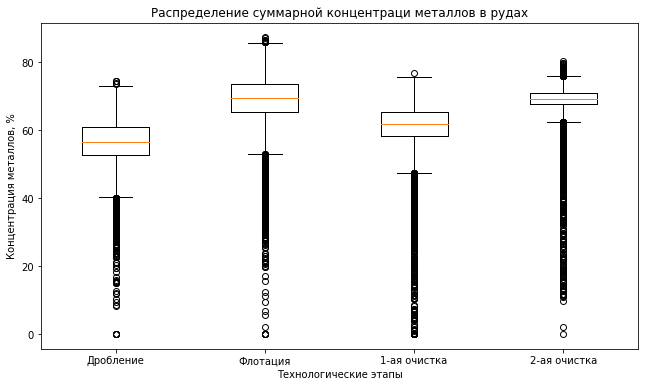

In [23]:
# визуализация суммарной концентрации
plt.figure(figsize=(10.7, 6))
plt.boxplot(df_train_all_concentrate, labels = ['Дробление', 'Флотация', '1-ая очистка', '2-ая очистка'])
plt.title('Распределение суммарной концентраци металлов в рудах')
plt.ylabel('Концентрация металлов, %')
plt.xlabel('Технологические этапы')
plt.show()

**Вывод:** Присутствует большое количество _выбросов_ снизу, т.е. через весь процесс обогажения руды проходит сырьё с низким содержание металлов, в том числе и золото. Об этом же свидетельствует [предыдущий раздел проекта](#section_6), в котором была исследована концентрация металлов в руде по отдельности.
___

## Модель

Обучение разные модели и оценка их качества кросс-валидацией.
Нужно спрогнозировать сразу две величины:
- эффективность обогащения [чернового концентрата](#section_7) `rougher.output.recovery`;
- эффективность обогащения [финального концентрата](#section_8) `final.output.recovery`.

Лучшую модель необходимо проверьте на тестовой выборке.
Для оценки качества модели введена метрика — **sMAPE** (англ. _Symmetric Mean Absolute Percentage Error_, «симметричное среднее абсолютное процентное отклонение»).

### Функция для вычисления sMAPE.

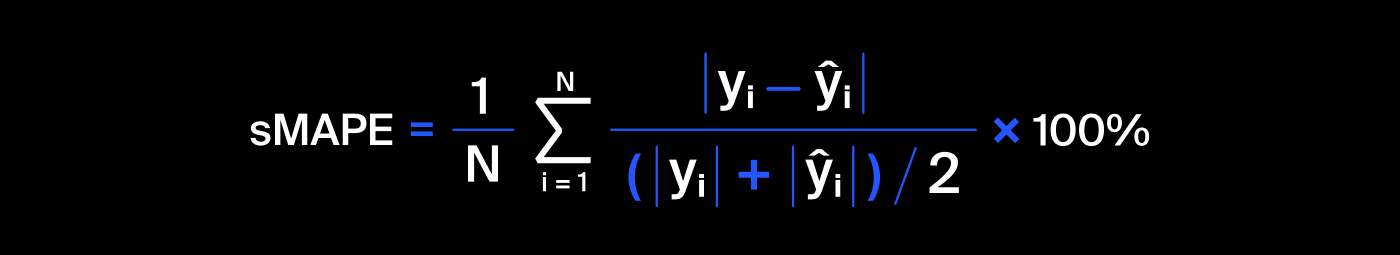

где:
 - **y** - значение целевого признака,
 - **ŷ** - значение предсказания для объекта,
 - **i** - порядковый номер объекта в выборке,
 - **N** - количество объектов в выборке.

In [24]:
# функция вычисления метрики sMAPE
def smape_score(target, predictions):
    target = list(target)
    sigma = 0
    N = len(target)
    for i in range(N):
        sigma += abs(target[i] - predictions[i]) / ((abs(target[i]) + abs(predictions[i]))/2)
        smape = sigma / N * 100
    return smape

<a id='section_7'></a>
### Исследование моделей для КВЗ из финального концентрата

In [25]:
# выделение признаков и валидационной выборки для ПОЛНОГО цикла обогащения
final_target = df_train['final.output.recovery']
final_features = df_train[equals_columns].drop(['date'], axis=1)
final_target_train, final_target_valid, final_features_train, final_features_valid = train_test_split(final_target,
                                                                                                      final_features,
                                                                                                      train_size=0.75,
                                                                                                      random_state=RS)

In [26]:
# линейная регрессия (Linear_Regression)
best_final_smape = 100

model = LinearRegression()
model.fit(final_features_train, final_target_train)
final_prediction_valid = model.predict(final_features_valid)
final_smape = smape_score(final_target_valid, final_prediction_valid)
if final_smape < best_final_smape:
    best_final_model = model

print('Минимальная погрешность предсказаний модели: {:.2f}%'.format(final_smape))

Минимальная погрешность предсказаний модели: 7.92%


  0%|          | 0/15 [00:00<?, ?it/s]

Минимальная погрешность предсказаний модели: 7.37%, при глубине решающего дерева: 11


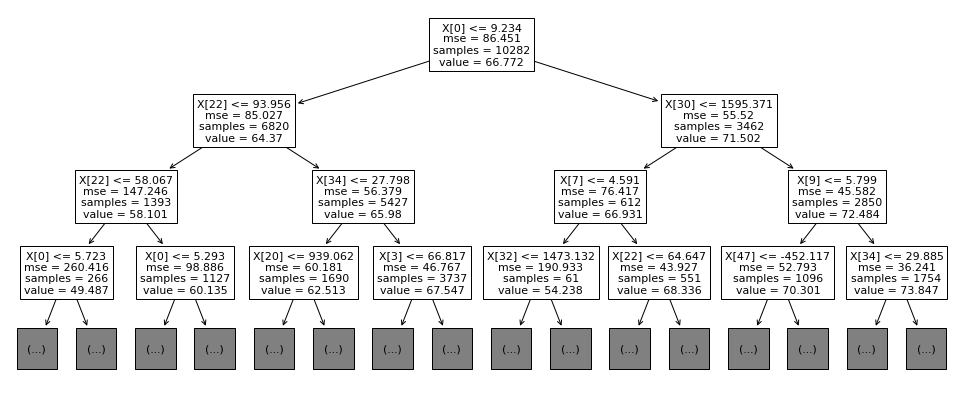

In [27]:
# решающее дерево (Decision_Tree)
for depth in tqdm(range(1, 16)):
    model = DecisionTreeRegressor(max_depth=depth, random_state=RS)
    model.fit(final_features_train, final_target_train)
    final_prediction_valid = model.predict(final_features_valid)
    final_smape = smape_score(final_target_valid, final_prediction_valid)
    if final_smape < best_final_smape:
        best_final_smape = final_smape
        best_depth = depth
        best_final_model = model

print('Минимальная погрешность предсказаний модели: {:.2f}%, при глубине решающего дерева: {}'.format(best_final_smape,
                                                                                                      best_depth))

# визуализация решающего дерева
fig = plt.figure(figsize=(17, 7))
plot_tree(best_final_model, max_depth=3, fontsize=11)
plt.show()

In [28]:
# случайный лес (Random_Forest)
final_list_est = []
final_list_smape = []

for est in tqdm(range(10, 51, 10)):
    for depth in range(1, 13):
        model = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=RS)
        model.fit(final_features_train, final_target_train)
        final_prediction_valid = model.predict(final_features_valid)
        final_smape = smape_score(final_target_valid, final_prediction_valid) 
        if final_smape < best_final_smape:
            best_final_smape = final_smape
            best_final_model = model
            best_dep = depth
            best_est = est
    final_list_est.append(est)
    final_list_smape.append(final_smape)

print('Минимальная погрешность предсказаний: {:.2f}%, при кол-ве деревьев: {}, и их глубине: {}'.format(best_final_smape,
                                                                                                        best_est,
                                                                                                        best_dep))

  0%|          | 0/5 [00:00<?, ?it/s]

Минимальная погрешность предсказаний: 6.11%, при кол-ве деревьев: 50, и их глубине: 12


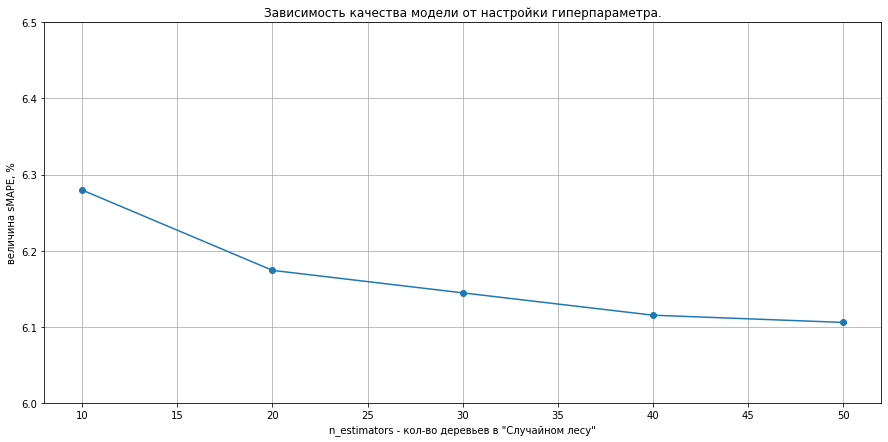

In [45]:
# Визуализация зависимости качества модели от изменения гиперпараметра.
smape_score_data = pd.DataFrame({'est': final_list_est, 'sMAPE_score': final_list_smape})
smape_score_data.plot(style='o-', x='est', y='sMAPE_score', grid=True, legend=False, figsize=(15,7), ylim=(6.0, 6.5),
                      title='Зависимость качества модели от настройки гиперпараметра.',
                      xlabel='n_estimators - кол-во деревьев в "Случайном лесу"',
                      ylabel='величина sMAPE, %');

<a id='section_8'></a>
### Исследование моделей для КВЗ из чернового концентрата

In [29]:
# выделение признаков и валидационной выборки для ГРУБОГО этапа
rougher_columns = ['rougher.input.feed_ag', 'rougher.input.feed_pb',
                   'rougher.input.feed_au', 'rougher.input.feed_sol',
                   'rougher.input.feed_rate', 'rougher.input.feed_size',
                   'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
                   'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate',
                   'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
                   'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
                   'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
                   'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
                   'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
                   'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',]

rougher_target = df_train['rougher.output.recovery']
rougher_features = df_train[rougher_columns]
rougher_target_train, rougher_target_valid, rougher_features_train, rougher_features_valid = train_test_split(rougher_target,
                                                                                                              rougher_features,
                                                                                                              train_size=0.75,
                                                                                                              random_state=RS)

In [30]:
# линейная регрессия (Linear_Regression)
best_rougher_smape = 100

model = LinearRegression()
model.fit(rougher_features_train, rougher_target_train)
rougher_prediction_valid = model.predict(rougher_features_valid)
rougher_smape = smape_score(rougher_target_valid, rougher_prediction_valid)
if rougher_smape < best_rougher_smape:
    best_rougher_model = model
            
print('Минимальная погрешность предсказаний LR-модели: {:.2f}%'.format(rougher_smape))

Минимальная погрешность предсказаний LR-модели: 5.03%


In [31]:
# решающее дерево (Decision_Tree)
for depth in tqdm(range(1, 16)):
    model = DecisionTreeRegressor(max_depth=depth, random_state=RS)
    model.fit(rougher_features_train, rougher_target_train)
    rougher_prediction_valid = model.predict(rougher_features_valid)
    rougher_smape = smape_score(rougher_target_valid, rougher_prediction_valid)
    if rougher_smape < best_rougher_smape:
        best_rougher_smape = rougher_smape
        best_rougher_model = model
        best_depth = depth

print('Минимальная погрешность предсказаний DT-модели: {:.2f}%, при глубине решающего дерева: {}'.format(best_rougher_smape,
                                                                                                         best_depth))

  0%|          | 0/15 [00:00<?, ?it/s]

Минимальная погрешность предсказаний DT-модели: 3.64%, при глубине решающего дерева: 13


In [32]:
# случайный лес (Random_Forest)
rougher_list_est = []
rougher_list_smape = []

for est in tqdm(range(10, 51, 10)):
    for depth in range(1, 14):
        model = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=RS)
        model.fit(rougher_features_train, rougher_target_train)
        rougher_prediction_valid = model.predict(rougher_features_valid)
        rougher_smape = smape_score(rougher_target_valid, rougher_prediction_valid)
        if rougher_smape < best_rougher_smape:
            best_rougher_smape = rougher_smape
            best_rougher_model = model
            best_dep = depth
            best_est = est
    rougher_list_est.append(est)
    rougher_list_smape.append(rougher_smape)

print('Минимальная погрешность предсказаний RF: {:.2f}%, при кол-ве деревьев: {}, и их глубине: {}'.format(best_rougher_smape,
                                                                                                           best_est,
                                                                                                           best_dep))

  0%|          | 0/5 [00:00<?, ?it/s]

Минимальная погрешность предсказаний RF: 2.97%, при кол-ве деревьев: 50, и их глубине: 13


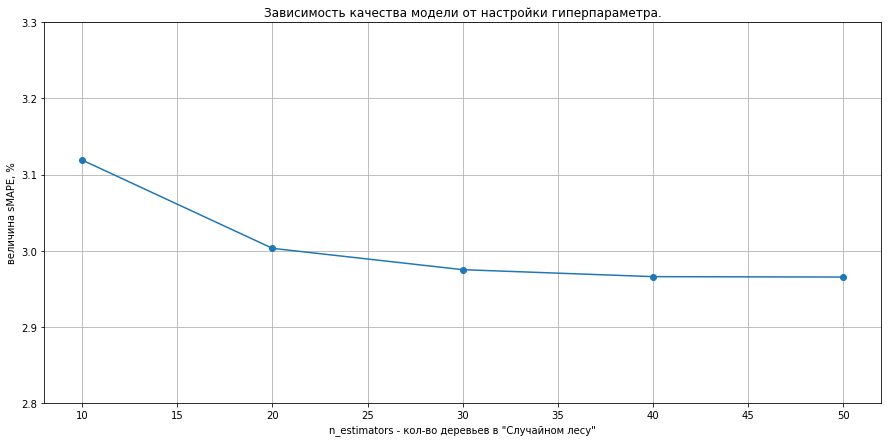

In [47]:
# Визуализация зависимости качества модели от изменения гиперпараметра.
smape_score_data = pd.DataFrame({'est': rougher_list_est, 'sMAPE_score': rougher_list_smape})
smape_score_data.plot(style='o-', x='est', y='sMAPE_score', grid=True, legend=False, figsize=(15,7), ylim=(2.8, 3.3),
                      title='Зависимость качества модели от настройки гиперпараметра.',
                      xlabel='n_estimators - кол-во деревьев в "Случайном лесу"',
                      ylabel='величина sMAPE, %');

**Вывод:**

Наиболее точная модель **Случайный лес**: минимальная погрешность (2.77% - 5.93%), но требует ощутимо много времени для обучения и подбора гиперпараметров.

**Решающее дерево** имеет стреднюю точность (3.64% - 7.12%), при макс. глубине 12-13 ветвлений. Может быть полезна для работы с бОльшими выборками, благодаря быстродействию.

**Линейная регрессия** - максимальная погрешность (5.04% - 8.13%) и быстродейственность среди всех перечисленных моделей.

*на этом этапе подбор гиперпараметров завершен.

### Тестирование модели

В качестве основной модели был выбран *Случайный лес*, ввиду отсутствия ограничений по времени. Это позволяет получить максимальную точность из имеющихся моделей.

Поскольку в работе используются две индивидуальные модели предсказания, отдельно для каждого этапа очистки, то для расчёта суммарной метрики будет использована слежующая формула:

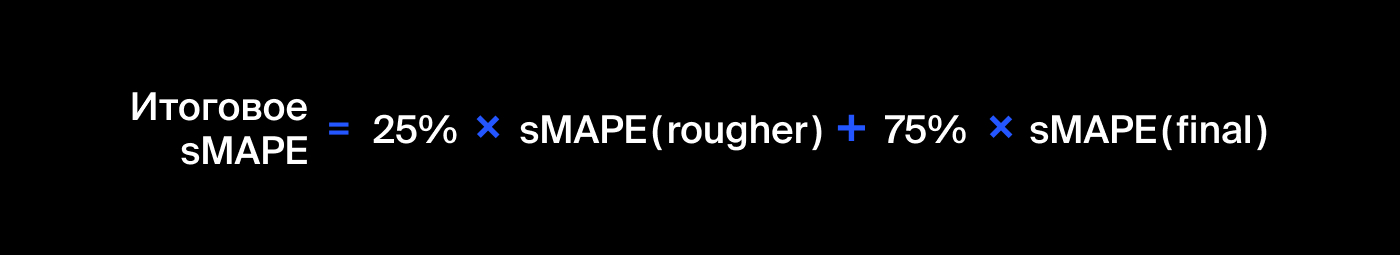

In [33]:
# выделение признаков для полного цикла обогащения и грубого этапа, отдельно
final_target_test   = df_full[df_full['date'].isin(df_test['date'].values)]['final.output.recovery']
final_features_test = df_test.drop(['date'], axis=1)

rougher_target_test   = df_full[df_full['date'].isin(df_test['date'].values)]['rougher.output.recovery']
rougher_features_test = df_test[rougher_columns]

final_prediction_test   = best_final_model.predict(final_features_test)
rougher_prediction_test = best_rougher_model.predict(rougher_features_test)

final_smape   = smape_score(final_target_test, final_prediction_test)
rougher_smape = smape_score(rougher_target_test, rougher_prediction_test)
general_smape = 0.75*final_smape + 0.25*rougher_smape

print('Погрешность предсказаний КВЗ на этапе флотации: {:.2f}%'.format(final_smape))
print('Погрешность предсказаний КВЗ по завершению процесса обогащения: {:.2f}%'.format(rougher_smape))
print('Итоговая погрешность предсказаний КВЗ на всех этапах: {:.2f}%'.format(general_smape))

Погрешность предсказаний КВЗ на этапе флотации: 9.86%
Погрешность предсказаний КВЗ по завершению процесса обогащения: 8.17%
Итоговая погрешность предсказаний КВЗ на всех этапах: 9.44%


### Проверка на адекватность

In [34]:
# константная модель
const_model = DummyRegressor(strategy="mean")

const_model.fit(final_features_train, final_target_train)
final_dummy_prediction = const_model.predict(final_features_test)

const_model.fit(rougher_features_train, rougher_target_train)
rougher_dummy_prediction = const_model.predict(rougher_features_test)

final_dummy_smape = smape_score(final_target_test, final_dummy_prediction)
rougher_dummy_smape = smape_score(rougher_target_test, rougher_dummy_prediction)
general_smape = 0.75*final_dummy_smape + 0.25*rougher_dummy_smape

print('Погрешность предсказаний КВЗ на этапе флотации: {:.2f}%'.format(final_dummy_smape))
print('Погрешность предсказаний КВЗ по завершению процесса обогащения: {:.2f}%'.format(rougher_dummy_smape))
print('Итоговая погрешность предсказаний КВЗ на всех этапах: {:.2f}%'.format(general_smape))

Погрешность предсказаний КВЗ на этапе флотации: 10.06%
Погрешность предсказаний КВЗ по завершению процесса обогащения: 9.06%
Итоговая погрешность предсказаний КВЗ на всех этапах: 9.81%


## Общий вывод

Исходные данные по бóльшей части содержали корректную информаци. _Дубликаты_ - отстутствую. В некоторых объектах встречаются _пропуски_ (были заполнены схожими значениями той же партии материала). Встречались редкие случаи _выбрасов_ и _аномалий_. Во избежания ошибок и неточностей, вызванные этими артефактами в данных, стоит обеспечить _обратную связь_ с предприятием (если это возможно): передать информацию о сомнительных объектах, получить ответ как стоит расценивать эти объекты, и внести изменения в этап предобработки данных. А так же запросить консультацию по параметрам тех. процесса. Понимание значимости того или иного параметра позволит осознано подойти к предобработке данных и настройке модели.

Результатом текущей работы стал выбор RF-модели (Случайный лес), с максимальной точностью - в качестве основной. На базе которой сформировано 2 алгоритма для предсказания коэффициент восстановления золота на этапе _флотации_ и _в конце_ процесса обогащения. Тестирование показало погрешность 9.86% и 8.17%, соответственно.

Итоговая погрешность 9.44%.